### Problem Statement

*Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.*

*The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.*

*The company wants to understand and process the data coming out of data engineering pipelines:*

*• Clean, sanitize and manipulate data to get useful features out of raw fields*

*• Make sense out of the raw data and help the data science team to build forecasting models on it*

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [186]:
df = pd.read_csv('delhivery_data.csv')
print('Shape',df.shape)

Shape (144867, 24)


In [187]:
df.sample(5)

data          trip_creation_time  \
117424  training  2018-09-26 01:08:28.999212   
10698       test  2018-09-28 05:23:15.359220   
126208  training  2018-09-24 23:38:00.734009   
131177  training  2018-09-22 19:15:38.509901   
94690       test  2018-10-03 14:36:50.944850   

                                      route_schedule_uuid route_type  \
117424  thanos::sroute:16f438c4-c258-4955-8358-bdb1e25...        FTL   
10698   thanos::sroute:96a80600-40e1-436b-9161-fa68f9e...        FTL   
126208  thanos::sroute:9d2bd01b-a62f-4e36-8ac2-247e5fb...        FTL   
131177  thanos::sroute:d9a57c14-540d-4dc0-8cda-8f8e597...    Carting   
94690   thanos::sroute:21cefd80-3296-49ce-8fe6-77f3918...        FTL   

                      trip_uuid source_center  \
117424  trip-153792410899895903  IND421302AAG   
10698   trip-153811219535896559  IND854326AAB   
126208  trip-153783228073374044  IND788026AAC   
131177  trip-153764373850958933  IND201301AAM   
94690   trip-153857741094459492  IND282001AAA   

                              source_name destination_center  \
117424  Bhiwandi_Mankoli_HB (Maharashtra)       IND712311AAA   
10698          Purnia_Central_H_2 (Bihar)       IND000000ACB   
126208         Silchar_Sirikona_H (Assam)       IND781018AAB   
131177   Noida_Sector63_L (Uttar Pradesh)       IND000000ACB   
94690        Agra_Idgah_P (Uttar Pradesh)       IND000000ACB   

                        destination_name               od_start_time  \
117424  Kolkata_Dankuni_HB (West Bengal)  2018-09-26 01:08:28.999212   
10698      Gurgaon_Bilaspur_HB (Haryana)  2018-09-29 17:31:42.785909   
126208              Guwahati_Hub (Assam)  2018-09-24 23:38:00.734009   
131177     Gurgaon_Bilaspur_HB (Haryana)  2018-09-22 19:15:38.509901   
94690      Gurgaon_Bilaspur_HB (Haryana)  2018-10-04 17:27:20.880865   

                       od_end_time  start_scan_to_end_scan  is_cutoff  \
117424  2018-09-28 07:08:32.209758                  3240.0       True   
10698   2018-10-01 05:29:49.831653                  2158.0       True   
126208  2018-09-25 11:41:24.659994                   723.0       True   
131177  2018-09-22 23:11:02.232777                   235.0      False   
94690   2018-10-05 00:41:51.892919                   434.0       True   

        cutoff_factor     cutoff_timestamp  actual_distance_to_destination  \
117424            990  2018-09-27 00:44:48                      991.977861   
10698             814  2018-09-30 05:35:32                      814.936051   
126208             44  2018-09-25 08:27:35                       45.297225   
131177             61  2018-09-22 20:36:30                       61.533399   
94690              88  2018-10-04 22:02:07                       88.569685   

        actual_time  osrm_time  osrm_distance    factor  segment_actual_time  \
117424       1811.0      864.0      1207.1453  2.096065                 51.0   
10698        1433.0      695.0       932.8475  2.061871                 53.0   
126208        119.0       73.0        93.2448  1.630137                 59.0   
131177        151.0       77.0        79.6666  1.961039                 13.0   
94690         158.0       81.0       104.2774  1.950617                 56.0   

        segment_osrm_time  segment_osrm_distance  segment_factor  
117424               22.0                31.8851        2.318182  
10698                21.0                30.2396        2.523810  
126208               26.0                38.2617        2.269231  
131177                9.0                 7.0858        1.444444  
94690                16.0                23.5493        3.500000

`We have around 150k rows with 24 columns.`

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [189]:
df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

### Remove missing values
`As no of missing values records are very less (<3%) compare to overall data, we can delete these rows.`

In [190]:
df = df.dropna(subset=['source_name','destination_name'], axis=0)

In [191]:
df.isnull().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

In [192]:
df.shape

(144316, 24)

`Date conversion`

In [193]:
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])

In [194]:
df.head(2)

data         trip_creation_time  \
0  training 2018-09-20 02:35:36.476840   
1  training 2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

               od_start_time                od_end_time  \
0 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
1 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   

   start_scan_to_end_scan  is_cutoff  cutoff_factor     cutoff_timestamp  \
0                    86.0       True              9  2018-09-20 04:27:55   
1                    86.0       True             18  2018-09-20 04:17:55   

   actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                       10.435660         14.0       11.0        11.9653   
1                       18.936842         24.0       20.0        21.7243   

     factor  segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0  1.272727                 14.0               11.0                11.9653   
1  1.200000                 10.0                9.0                 9.7590   

   segment_factor  
0        1.272727  
1        1.111111

In [195]:
df.describe(datetime_is_numeric=True)

trip_creation_time                  od_start_time  \
count                         144316                         144316   
mean   2018-09-22 13:05:09.454117120  2018-09-22 17:32:42.435769344   
min       2018-09-12 00:00:16.535741     2018-09-12 00:00:16.535741   
25%    2018-09-17 02:46:11.004421120  2018-09-17 07:37:35.014584832   
50%    2018-09-22 03:36:19.186585088  2018-09-22 07:35:23.038482944   
75%    2018-09-27 17:53:19.027942912  2018-09-27 22:01:30.861209088   
max       2018-10-03 23:59:42.701692     2018-10-06 04:27:23.392375   
std                              NaN                            NaN   

                         od_end_time  start_scan_to_end_scan  cutoff_factor  \
count                         144316           144316.000000  144316.000000   
mean   2018-09-23 09:36:54.057172224              963.697698     233.561345   
min       2018-09-12 00:50:10.814399               20.000000       9.000000   
25%       2018-09-18 01:29:56.978912              161.000000      22.000000   
50%    2018-09-23 02:49:00.936600064              451.000000      66.000000   
75%    2018-09-28 12:13:41.675546112             1645.000000     286.000000   
max       2018-10-08 03:00:24.353479             7898.000000    1927.000000   
std                              NaN             1038.082976     345.245823   

       actual_distance_to_destination    actual_time      osrm_time  \
count                   144316.000000  144316.000000  144316.000000   
mean                       234.708498     417.996237     214.437055   
min                          9.000045       9.000000       6.000000   
25%                         23.352027      51.000000      27.000000   
50%                         66.135322     132.000000      64.000000   
75%                        286.919294     516.000000     259.000000   
max                       1927.447705    4532.000000    1686.000000   
std                        345.480571     598.940065     308.448543   

       osrm_distance         factor  segment_actual_time  segment_osrm_time  \
count  144316.000000  144316.000000        144316.000000      144316.000000   
mean      285.549785       2.120178            36.175379          18.495697   
min         9.008200       0.144000          -244.000000           0.000000   
25%        29.896250       1.604545            20.000000          11.000000   
50%        78.624400       1.857143            28.000000          17.000000   
75%       346.305400       2.212280            40.000000          22.000000   
max      2326.199100      77.387097          3051.000000        1611.000000   
std       421.717826       1.717065            53.524298          14.774008   

       segment_osrm_distance  segment_factor  
count          144316.000000   144316.000000  
mean               22.818993        2.218707  
min                 0.000000      -23.444444  
25%                12.053975        1.347826  
50%                23.508300        1.684211  
75%                27.813325        2.250000  
max              2191.403700      574.250000  
std                17.866367        4.854804

In [196]:
df.describe(include=['object'])

data                                route_schedule_uuid  \
count     144316                                             144316   
unique         2                                               1497   
top     training  thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...   
freq      104632                                               1812   

       route_type                trip_uuid source_center  \
count      144316                   144316        144316   
unique          2                    14787          1496   
top           FTL  trip-153837029526866991  IND000000ACB   
freq        99132                      101         23267   

                          source_name destination_center  \
count                          144316             144316   
unique                           1496               1466   
top     Gurgaon_Bilaspur_HB (Haryana)       IND000000ACB   
freq                            23267              15192   

                     destination_name     cutoff_timestamp  
count                          144316               144316  
unique                           1466                92894  
top     Gurgaon_Bilaspur_HB (Haryana)  2018-09-24 05:19:20  
freq                            15192                   39

`293 and 261 null values in source name and destination name respectively so deleted those rows as number is very less`

`By mean and median difference we can say there are some outliers in: `

`Numerical columns: start_scan_to_end_scan, actual_distance_to_destination, actual_time, osrm_time, osrm_distance`

`We have two route types where FTL is in TOP with aprox 100k records`

`Most common source and destination are Gurgaon_Bilaspur_HB (Haryana).`


### Let's drop unnecessary columns

In [197]:
#unknown columns
drop_cols = ['is_cutoff', 'cutoff_factor','cutoff_timestamp', 'factor','segment_factor']
df = df.drop(drop_cols, axis=1)

In [198]:
df.head(2)

data         trip_creation_time  \
0  training 2018-09-20 02:35:36.476840   
1  training 2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

               od_start_time                od_end_time  \
0 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
1 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   

   start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                    86.0                       10.435660         14.0   
1                    86.0                       18.936842         24.0   

   osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0       11.0        11.9653                 14.0               11.0   
1       20.0        21.7243                 10.0                9.0   

   segment_osrm_distance  
0                11.9653  
1                 9.7590

In [199]:
cat_cols = df.dtypes =='object'
cat_cols = list(cat_cols[cat_cols].index)

num_cols = df.dtypes !='object'
num_cols = list(num_cols[num_cols].index)

In [200]:
print('Cat cols')
cat_cols

Cat cols


['data',
 'route_schedule_uuid',
 'route_type',
 'trip_uuid',
 'source_center',
 'source_name',
 'destination_center',
 'destination_name']

In [201]:
print('num cols')
num_cols

num cols


['trip_creation_time',
 'od_start_time',
 'od_end_time',
 'start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance']

`Data has repetitive rows for same trip_uuid as there are multiple routes within each trip.`

`Let's group by these rows`

### Row merging

`First Grouping on trip uuid, source center and destination center`

In [202]:
df_gp = df.groupby(['trip_uuid', 'source_center', 'destination_center'])
df_grouped = df_gp.aggregate({'data': max,
                         'trip_creation_time':max,
                         'route_schedule_uuid':max,
                         'route_type':max,
                         'source_name':max,
                         'destination_name':max,
                         'od_start_time':max,
                         'od_end_time':max,
                         'start_scan_to_end_scan':max,
                         'actual_distance_to_destination':max,
                         'actual_time':max,
                         'osrm_time':max,
                         'osrm_distance':max,
                         'segment_actual_time':sum,
                         'segment_osrm_time':sum,
                         'segment_osrm_distance':sum
                        }).sort_values('od_start_time')
df_grouped.reset_index(inplace=True)
df_grouped.shape

(26222, 19)

In [203]:
df_grouped.groupby('trip_uuid').count()['source_name'].sort_values(ascending=False).head()

trip_uuid
trip-153717306559016761    8
trip-153710494321650505    8
trip-153758895506669465    8
trip-153801215317324804    7
trip-153723403393244965    7
Name: source_name, dtype: int64

In [204]:
df_grouped[df_grouped.trip_uuid=='trip-153717306559016761'].head()

trip_uuid source_center destination_center      data  \
6587  trip-153717306559016761  IND781018AAB       IND781354AAA  training   
6706  trip-153717306559016761  IND781354AAA       IND781335AAA  training   
6799  trip-153717306559016761  IND000000AET       IND000000AAS  training   
6876  trip-153717306559016761  IND000000AAS       IND783370AAC  training   
6965  trip-153717306559016761  IND783370AAC       IND783301AAA  training   

             trip_creation_time  \
6587 2018-09-17 08:30:59.260046   
6706 2018-09-17 08:30:59.260046   
6799 2018-09-17 08:30:59.260046   
6876 2018-09-17 08:30:59.260046   
6965 2018-09-17 08:30:59.260046   

                                    route_schedule_uuid route_type  \
6587  thanos::sroute:4cbecb35-356b-4b68-bf3c-6225b5e...        FTL   
6706  thanos::sroute:4cbecb35-356b-4b68-bf3c-6225b5e...        FTL   
6799  thanos::sroute:4cbecb35-356b-4b68-bf3c-6225b5e...        FTL   
6876  thanos::sroute:4cbecb35-356b-4b68-bf3c-6225b5e...        FTL   
6965  thanos::sroute:4cbecb35-356b-4b68-bf3c-6225b5e...        FTL   

                        source_name               destination_name  \
6587           Guwahati_Hub (Assam)      Rangia_HosptlRd_D (Assam)   
6706      Rangia_HosptlRd_D (Assam)     Nalbari_Bhgtpura_D (Assam)   
6799     Barpeta_ShivBari_D (Assam)  Bongaigaon_Chpaguri_D (Assam)   
6876  Bongaigaon_Chpaguri_D (Assam)   Kokrajhar_PigonDPP_D (Assam)   
6965   Kokrajhar_PigonDPP_D (Assam)      Dhubri_Tetultol_D (Assam)   

                  od_start_time                od_end_time  \
6587 2018-09-17 08:30:59.260046 2018-09-17 12:11:54.824295   
6706 2018-09-17 12:11:54.824295 2018-09-17 13:00:36.897304   
6799 2018-09-17 15:52:05.525192 2018-09-17 18:18:50.209622   
6876 2018-09-17 18:18:50.209622 2018-09-17 20:17:37.803503   
6965 2018-09-17 20:17:37.803503 2018-09-18 00:00:58.029063   

      start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
6587                   220.0                       35.913258        119.0   
6706                    48.0                       17.766035         38.0   
6799                   146.0                       47.976707        123.0   
6876                   118.0                       28.224035         80.0   
6965                   223.0                       52.399971        199.0   

      osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
6587       55.0        65.6398                119.0               54.0   
6706       15.0        19.4503                 38.0               15.0   
6799       50.0        69.6757                122.0               48.0   
6876       30.0        41.7072                 80.0               30.0   
6965       48.0        67.6962                197.0               47.0   

      segment_osrm_distance  
6587                65.6398  
6706                19.4503  
6799                69.6758  
6876                41.7073  
6965                67.6962

`Second grouping on trip uuid.`

`Lets take first value from source and last value from destination.`

In [205]:
df_gp2 = df_grouped.groupby('trip_uuid')
df_grouped2 = df_gp2.aggregate({'source_center':'first',
                                'destination_center':'last',
                                'data':max,
                                'trip_creation_time':max,
                                'route_schedule_uuid':max,
                                'route_type':max,
                                'source_name':'first',
                                'destination_name':'last',
                                'od_start_time':'first',
                                'od_end_time':'last',
                                'start_scan_to_end_scan':sum,
                                'actual_distance_to_destination':sum,
                                'actual_time':sum,
                                'osrm_time':sum,
                                'osrm_distance':sum,
                                'segment_actual_time':sum,
                                'segment_osrm_time':sum,
                                'segment_osrm_distance':sum
                               })
df_grouped2.reset_index(inplace=True)
df_grouped2.shape
                               

(14787, 19)

In [206]:
df_grouped2.sample(5)

trip_uuid source_center destination_center      data  \
10699   trip-153801010153440785  IND422011AAD       IND422011AAD      test   
253     trip-153673465075403520  IND302014AAB       IND302023AAA  training   
1959   trip-1536951993462051000  IND414001AAA       IND411033AAA  training   
9283    trip-153783479182752278  IND515134AAA       IND515134AAA  training   
10901   trip-153803674799495496  IND221313AAA       IND000000ACB      test   

              trip_creation_time  \
10699 2018-09-27 01:01:41.534663   
253   2018-09-12 06:44:10.754569   
1959  2018-09-14 19:06:33.462319   
9283  2018-09-25 00:19:51.827914   
10901 2018-09-27 08:25:47.995230   

                                     route_schedule_uuid route_type  \
10699  thanos::sroute:36941a6b-0e90-4582-a95a-96666dc...    Carting   
253    thanos::sroute:c5b68ed0-0bbf-4b00-838d-274933a...    Carting   
1959   thanos::sroute:faaeb334-386d-4147-b381-bd9bd7e...        FTL   
9283   thanos::sroute:3f001d56-e933-4ba1-a7cf-26828f7...    Carting   
10901  thanos::sroute:21cefd80-3296-49ce-8fe6-77f3918...        FTL   

                                 source_name  \
10699        Nashik_TgrniaRD_I (Maharashtra)   
253           Jaipur_Central_I_7 (Rajasthan)   
1959             AhmedNagar_DC (Maharashtra)   
9283   Puttaprthi_Gokulam_D (Andhra Pradesh)   
10901   Varanasi_Central_H_4 (Uttar Pradesh)   

                            destination_name              od_start_time  \
10699        Nashik_TgrniaRD_I (Maharashtra) 2018-09-27 01:01:41.534663   
253                  Ambabadi_DC (Rajasthan) 2018-09-12 06:44:10.754569   
1959           Pune_Tathawde_H (Maharashtra) 2018-09-15 01:09:07.159947   
9283   Puttaprthi_Gokulam_D (Andhra Pradesh) 2018-09-25 00:19:51.827914   
10901          Gurgaon_Bilaspur_HB (Haryana) 2018-09-27 08:25:47.995230   

                     od_end_time  start_scan_to_end_scan  \
10699 2018-09-27 10:48:45.816137                   584.0   
253   2018-09-12 08:12:10.084480                    87.0   
1959  2018-09-15 07:35:32.556728                   360.0   
9283  2018-09-25 07:50:42.031549                   448.0   
10901 2018-09-28 23:27:50.853515                  2339.0   

       actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
10699                      241.021061        509.0      244.0       307.1399   
253                         19.780779         51.0       23.0        25.5601   
1959                       121.631547        250.0      116.0       147.6886   
9283                       147.096939        352.0      161.0       177.0257   
10901                      701.043806       1487.0      664.0       904.0942   

       segment_actual_time  segment_osrm_time  segment_osrm_distance  
10699                500.0              334.0               367.9898  
253                   50.0               26.0                30.5933  
1959                 249.0              134.0               164.1687  
9283                 345.0              154.0               177.0260  
10901               1473.0              926.0              1263.7608

In [207]:
df_grouped2[df_grouped2.trip_uuid=='trip-153717306559016761']

trip_uuid source_center destination_center      data  \
3850  trip-153717306559016761  IND781018AAB       IND781018AAB  training   

             trip_creation_time  \
3850 2018-09-17 08:30:59.260046   

                                    route_schedule_uuid route_type  \
3850  thanos::sroute:4cbecb35-356b-4b68-bf3c-6225b5e...        FTL   

               source_name      destination_name              od_start_time  \
3850  Guwahati_Hub (Assam)  Guwahati_Hub (Assam) 2018-09-17 08:30:59.260046   

                    od_end_time  start_scan_to_end_scan  \
3850 2018-09-19 15:45:33.829977                  2831.0   

      actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
3850                       443.95629       1226.0      493.0       643.1371   

      segment_actual_time  segment_osrm_time  segment_osrm_distance  
3850               1218.0              494.0               655.8519

### Extract Features

`Source and destination name contain City-place-code (State) in this format. Let's extract all.`

In [208]:
import re
def extract_locations(location, loc_type):
    # print(location)
    results = dict()
    #extract state
    state_re = re.search(r'\((.*?)\)',location)

    if state_re:
        results[loc_type+'_state'] = state_re.group(1).strip()
    
        location = location.replace(state_re.group(0), '').strip()
    else:
        results[loc_type+'_state'] = np.nan
    
    location_re = re.findall(r'([A-Za-z0-9]+)', location)
    
    if len(location_re) > 1:
        #extract code
        if location_re[-1].isupper():
            results[loc_type+'_code'] = location_re[-1].strip()
            location_re.pop(-1)

        elif location_re[-2].isupper() and location_re[-1].isnumeric():
            results[loc_type+'_code'] = location_re[-2]+location_re[-1].strip()
            location_re.pop(-1)
            location_re.pop(-1)

        else:
            results[loc_type+'_code'] = np.nan

        #extract city and place
        results[loc_type+'_city'] = location_re[0].strip()
        location_re.pop(0)
        results[loc_type+'_place'] = " ".join(location_re).strip()

        
    else:
        results[loc_type+'_code'] = np.nan
        results[loc_type+'_city'] = location_re[0]
        results[loc_type+'_place'] = np.nan
        
        
    return [results[loc_type+'_city'],results[loc_type+'_place'],results[loc_type+'_code'],results[loc_type+'_state']]

    
            

In [209]:
df_grouped2[['source_city','source_place','source_code','source_state']] = df_grouped2.apply(lambda x : extract_locations(x['source_name'], 'source'), axis=1, result_type='expand')
                                                                                                                          
                                                                                                                          
df_grouped2[['destination_city','destination_place','destination_code','destination_state']] = df_grouped2.apply(lambda x : extract_locations(x['destination_name'], 'destination'), axis=1, result_type='expand')
                                                                                                                          
                                                                                                                          

In [210]:
df_grouped2.isna().sum()

trip_uuid                            0
source_center                        0
destination_center                   0
data                                 0
trip_creation_time                   0
route_schedule_uuid                  0
route_type                           0
source_name                          0
destination_name                     0
od_start_time                        0
od_end_time                          0
start_scan_to_end_scan               0
actual_distance_to_destination       0
actual_time                          0
osrm_time                            0
osrm_distance                        0
segment_actual_time                  0
segment_osrm_time                    0
segment_osrm_distance                0
source_city                          0
source_place                       173
source_code                       1218
source_state                         0
destination_city                     0
destination_place                  217
destination_code         

`Fill place and code null values with mode of that state`

In [211]:
#fill null source code with source state
for i in df_grouped2[df_grouped2['source_code'].isnull()]['source_state'].unique():
    impute_val1 = df_grouped2[df_grouped2['source_state']==i]['source_code'].mode().values[0]
    df_grouped2.loc[df_grouped2['source_state']==i, 'source_code'] = df_grouped2.loc[df_grouped2['source_state']==i, 'source_code'].fillna(impute_val1)
    

In [212]:
#fill null source place with source state
for i in df_grouped2[df_grouped2['source_place'].isnull()]['source_state'].unique():
    impute_val2 = df_grouped2[df_grouped2['source_state']==i]['source_place'].mode().values[0]
    df_grouped2.loc[df_grouped2['source_state']==i, 'source_place'] = df_grouped2.loc[df_grouped2['source_state']==i, 'source_place'].fillna(impute_val2)
    

In [213]:
#fill null source code with source state
for i in df_grouped2[df_grouped2['destination_code'].isnull()]['destination_state'].unique():
    impute_val3 = df_grouped2[df_grouped2['destination_state']==i]['destination_code'].mode().values[0]
    df_grouped2.loc[df_grouped2['destination_state']==i, 'destination_code'] = df_grouped2.loc[df_grouped2['destination_state']==i, 'destination_code'].fillna(impute_val3)
    

In [214]:
#fill null source code with source state
for i in df_grouped2[df_grouped2['destination_place'].isnull()]['destination_state'].unique():
    impute_val4 = df_grouped2[df_grouped2['destination_state']==i]['destination_place'].mode().values[0]
    df_grouped2.loc[df_grouped2['destination_state']==i, 'destination_place'] = df_grouped2.loc[df_grouped2['destination_state']==i, 'destination_place'].fillna(impute_val4)
    

In [215]:
df_grouped2.isna().sum()

trip_uuid                         0
source_center                     0
destination_center                0
data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
source_name                       0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
source_city                       0
source_place                      0
source_code                       0
source_state                      0
destination_city                  0
destination_place                 0
destination_code                  0
destination_state                 0
dtype: int64

In [216]:
df_grouped2.sample(5)

trip_uuid source_center destination_center      data  \
2352   trip-153697986613903479  IND000000ACB       IND110030AAD  training   
14548  trip-153859310940783608  IND756100AAC       IND756100AAC      test   
7582   trip-153761782937902454  IND560300AAA       IND560099AAB  training   
5674   trip-153739062100632377  IND695012AAA       IND683511AAA  training   
10921  trip-153804159986224086  IND723131AAA       IND723130AAA      test   

              trip_creation_time  \
2352  2018-09-15 02:51:01.266101   
14548 2018-10-03 18:58:29.408079   
7582  2018-09-22 12:03:49.379278   
5674  2018-09-19 20:57:01.006548   
10921 2018-09-27 09:46:39.862485   

                                     route_schedule_uuid route_type  \
2352   thanos::sroute:0c4a9769-9bcb-44c2-8af6-ed183e7...    Carting   
14548  thanos::sroute:38e6d56f-8d2e-44c8-9366-85501ed...        FTL   
7582   thanos::sroute:b8c85738-ff17-4a01-9200-db28e5b...    Carting   
5674   thanos::sroute:cb00e49a-7a32-4faf-84fb-b43fa57...        FTL   
10921  thanos::sroute:3990c6f5-953b-45ed-9654-dd2c137...        FTL   

                                source_name  \
2352          Gurgaon_Bilaspur_HB (Haryana)   
14548          Bhadrak_Central_I_2 (Orissa)   
7582      Bengaluru_KGAirprt_HB (Karnataka)   
5674         Trivandrum_Mnanthla_H (Kerala)   
10921  Manbazar_Central_DPP_1 (West Bengal)   

                        destination_name              od_start_time  \
2352        Delhi_Kishangarh_DPC (Delhi) 2018-09-15 02:51:01.266101   
14548       Bhadrak_Central_I_2 (Orissa) 2018-10-03 18:58:29.408079   
7582   Bengaluru_Bomsndra_HB (Karnataka) 2018-09-22 12:03:49.379278   
5674            Aluva_Peedika_H (Kerala) 2018-09-20 16:25:22.807218   
10921     Hura_Central_D_1 (West Bengal) 2018-09-27 11:03:03.935972   

                     od_end_time  start_scan_to_end_scan  \
2352  2018-09-15 05:42:00.912960                   170.0   
14548 2018-10-04 18:53:43.580120                  1318.0   
7582  2018-09-22 15:33:23.698217                   209.0   
5674  2018-09-21 03:06:05.226254                   640.0   
10921 2018-09-28 07:36:46.305808                  1232.0   

       actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
2352                        39.786804         88.0       51.0        45.8107   
14548                      288.668594       1050.0      350.0       470.1808   
7582                        41.933269        171.0       56.0        52.8513   
5674                       192.070409        373.0      231.0       238.6611   
10921                      102.675066       1123.0      143.0       167.6165   

       segment_actual_time  segment_osrm_time  segment_osrm_distance  \
2352                  86.0               65.0                62.0069   
14548               1043.0              425.0               534.9381   
7582                 169.0               70.0                73.1084   
5674                 370.0              235.0               226.8093   
10921               1123.0              143.0               167.6165   

      source_city source_place source_code source_state destination_city  \
2352      Gurgaon     Bilaspur          HB      Haryana            Delhi   
14548     Bhadrak      Central          I2       Orissa          Bhadrak   
7582    Bengaluru     KGAirprt          HB    Karnataka        Bengaluru   
5674   Trivandrum     Mnanthla           H       Kerala            Aluva   
10921    Manbazar      Central        DPP1  West Bengal             Hura   

      destination_place destination_code destination_state  
2352         Kishangarh              DPC             Delhi  
14548           Central               I2            Orissa  
7582           Bomsndra               HB         Karnataka  
5674            Peedika                H            Kerala  
10921           Central               D1       West Bengal

`No null values available now.`

`Extract features from Date time columns.`

In [217]:
df_grouped2['trip_year'] = df_grouped2['trip_creation_time'].dt.year
df_grouped2['trip_month'] = df_grouped2['trip_creation_time'].dt.month_name()
df_grouped2['trip_day'] = df_grouped2['trip_creation_time'].dt.day
df_grouped2['trip_day_name'] = df_grouped2['trip_creation_time'].dt.day_name()
df_grouped2['time_difference_start_end'] = (df_grouped2['od_end_time'] - df_grouped2['od_start_time']).dt.total_seconds()/60
df_grouped2.sample(2)

trip_uuid source_center destination_center      data  \
2067  trip-153696060020108850  IND813102AAA       IND813203AAA  training   
5254  trip-153733050554747982  IND517501AAB       IND517501AAB  training   

             trip_creation_time  \
2067 2018-09-14 21:30:00.201344   
5254 2018-09-19 04:15:05.547881   

                                    route_schedule_uuid route_type  \
2067  thanos::sroute:1e49263c-7844-4b1e-808b-0802f54...        FTL   
5254  thanos::sroute:cce26bb2-2365-4c9c-88f4-74322d1...    Carting   

                                source_name  \
2067                Banka_Wardno6_D (Bihar)   
5254  Tirupati_Balajicly_I (Andhra Pradesh)   

                           destination_name              od_start_time  \
2067           Kahalgaon_NdiaTola_D (Bihar) 2018-09-15 04:32:47.112065   
5254  Tirupati_Balajicly_I (Andhra Pradesh) 2018-09-19 04:15:05.547881   

                    od_end_time  start_scan_to_end_scan  \
2067 2018-09-15 10:26:39.411405                   353.0   
5254 2018-09-19 12:49:19.580621                   512.0   

      actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
2067                       63.724861        261.0       67.0        75.6465   
5254                      175.909883        348.0      153.0       212.1498   

      segment_actual_time  segment_osrm_time  segment_osrm_distance  \
2067                260.0               95.0                98.0363   
5254                341.0              147.0               212.1498   

     source_city source_place source_code    source_state destination_city  \
2067       Banka      Wardno6           D           Bihar        Kahalgaon   
5254    Tirupati    Balajicly           I  Andhra Pradesh         Tirupati   

     destination_place destination_code destination_state  trip_year  \
2067          NdiaTola                D             Bihar       2018   
5254         Balajicly                I    Andhra Pradesh       2018   

     trip_month  trip_day trip_day_name  time_difference_start_end  
2067  September        14        Friday                 353.871656  
5254  September        19     Wednesday                 514.233879

`Delete extra columns.`

In [218]:
drop_cols = ['trip_uuid', 'source_center', 'destination_center', 'trip_creation_time','route_schedule_uuid', 'source_name', 'destination_name',
             'od_start_time', 'od_end_time']
data = df_grouped2.drop(drop_cols, axis=1)
data.head(5)

data route_type  start_scan_to_end_scan  \
0  training        FTL                  2259.0   
1  training    Carting                   180.0   
2  training        FTL                  3933.0   
3  training    Carting                   100.0   
4  training        FTL                   717.0   

   actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                      824.732854       1562.0      743.0       991.3523   
1                       73.186911        143.0       68.0        85.1110   
2                     1932.273969       3347.0     1741.0      2372.0852   
3                       17.175274         59.0       15.0        19.6800   
4                      127.448500        341.0      117.0       146.7918   

   segment_actual_time  segment_osrm_time  segment_osrm_distance source_city  \
0               1548.0             1008.0              1320.4733      Bhopal   
1                141.0               65.0                84.1894      Tumkur   
2               3308.0             1941.0              2545.2678   Bangalore   
3                 59.0               16.0                19.8766      Mumbai   
4                340.0              115.0               146.7919     Bellary   

  source_place source_code    source_state destination_city destination_place  \
0     Trnsport           H  Madhya Pradesh          Gurgaon          Bilaspur   
1     Veersagr           I       Karnataka       Chikblapur          ShntiSgr   
2     Nelmngla           H       Karnataka       Chandigarh          Mehmdpur   
3          Hub          HB     Maharashtra           Mumbai            MiraRd   
4           Dc          HB       Karnataka          Bellary                Dc   

  destination_code destination_state  trip_year trip_month  trip_day  \
0               HB           Haryana       2018  September        12   
1                D         Karnataka       2018  September        12   
2                H            Punjab       2018  September        12   
3               IP       Maharashtra       2018  September        12   
4                H         Karnataka       2018  September        12   

  trip_day_name  time_difference_start_end  
0     Wednesday                2260.109800  
1     Wednesday                 181.611874  
2     Wednesday                3934.362520  
3     Wednesday                 100.494935  
4     Wednesday                 718.349042

In [219]:
data['actual_distance_to_destination'] = round(data['actual_distance_to_destination'],2)
data['osrm_distance'] = round(data['osrm_distance'], 2)
data['segment_osrm_distance'] = round(data['segment_osrm_distance'], 2)
data['time_difference_start_end'] = round(data['time_difference_start_end'], 2)
data.head()

data route_type  start_scan_to_end_scan  \
0  training        FTL                  2259.0   
1  training    Carting                   180.0   
2  training        FTL                  3933.0   
3  training    Carting                   100.0   
4  training        FTL                   717.0   

   actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                          824.73       1562.0      743.0         991.35   
1                           73.19        143.0       68.0          85.11   
2                         1932.27       3347.0     1741.0        2372.09   
3                           17.18         59.0       15.0          19.68   
4                          127.45        341.0      117.0         146.79   

   segment_actual_time  segment_osrm_time  segment_osrm_distance source_city  \
0               1548.0             1008.0                1320.47      Bhopal   
1                141.0               65.0                  84.19      Tumkur   
2               3308.0             1941.0                2545.27   Bangalore   
3                 59.0               16.0                  19.88      Mumbai   
4                340.0              115.0                 146.79     Bellary   

  source_place source_code    source_state destination_city destination_place  \
0     Trnsport           H  Madhya Pradesh          Gurgaon          Bilaspur   
1     Veersagr           I       Karnataka       Chikblapur          ShntiSgr   
2     Nelmngla           H       Karnataka       Chandigarh          Mehmdpur   
3          Hub          HB     Maharashtra           Mumbai            MiraRd   
4           Dc          HB       Karnataka          Bellary                Dc   

  destination_code destination_state  trip_year trip_month  trip_day  \
0               HB           Haryana       2018  September        12   
1                D         Karnataka       2018  September        12   
2                H            Punjab       2018  September        12   
3               IP       Maharashtra       2018  September        12   
4                H         Karnataka       2018  September        12   

  trip_day_name  time_difference_start_end  
0     Wednesday                    2260.11  
1     Wednesday                     181.61  
2     Wednesday                    3934.36  
3     Wednesday                     100.49  
4     Wednesday                     718.35

### EDA

In [220]:
data.shape

(14787, 23)

In [221]:
data.dtypes

data                               object
route_type                         object
start_scan_to_end_scan            float64
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
source_city                        object
source_place                       object
source_code                        object
source_state                       object
destination_city                   object
destination_place                  object
destination_code                   object
destination_state                  object
trip_year                           int64
trip_month                         object
trip_day                            int64
trip_day_name                      object
time_difference_start_end         float64
dtype: object

In [222]:
data.describe()

start_scan_to_end_scan  actual_distance_to_destination   actual_time  \
count            14787.000000                    14787.000000  14787.000000   
mean               529.429025                      164.291914    356.306012   
std                658.254936                      305.677625    561.517936   
min                 23.000000                        9.000000      9.000000   
25%                149.000000                       22.840000     67.000000   
50%                279.000000                       48.380000    148.000000   
75%                632.000000                      163.705000    367.000000   
max               7898.000000                     2187.480000   6265.000000   

          osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
count  14787.000000   14787.000000         14787.000000       14787.000000   
mean     161.669575     204.637600           353.059174         180.511598   
std      272.405903     370.951898           556.365911         314.679279   
min        6.000000       9.070000             9.000000           6.000000   
25%       29.000000      30.875000            66.000000          30.000000   
50%       60.000000      65.580000           147.000000          65.000000   
75%      168.000000     207.160000           364.000000         184.000000   
max     2032.000000    2840.080000          6230.000000        2564.000000   

       segment_osrm_distance  trip_year      trip_day  \
count           14787.000000    14787.0  14787.000000   
mean              222.705471     2018.0     18.375127   
std               416.846282        0.0      7.882198   
min                 9.070000     2018.0      1.000000   
25%                32.580000     2018.0     14.000000   
50%                69.780000     2018.0     19.000000   
75%               216.560000     2018.0     25.000000   
max              3523.630000     2018.0     30.000000   

       time_difference_start_end  
count               14787.000000  
mean                  546.138183  
std                   668.195973  
min                    23.460000  
25%                   150.930000  
50%                   287.420000  
75%                   670.645000  
max                  7898.550000

In [223]:
data.describe(include=['object'])

data route_type source_city source_place source_code source_state  \
count      14787      14787       14787        14787       14787        14787   
unique         2          2         665          643          42           29   
top     training    Carting   Bengaluru      Central          HB  Maharashtra   
freq       10645       8906        1015         1051        3998         2682   

       destination_city destination_place destination_code destination_state  \
count             14787             14787            14787             14787   
unique              761               724               44                32   
top              Mumbai           Central               HB       Maharashtra   
freq               1127               955             3003              2591   

       trip_month trip_day_name  
count       14787         14787  
unique          2             7  
top     September     Wednesday  
freq        13011          2731

`By mean and meadian difference, outliers can exist in almost all numerical features.`

`Carting, source: Bengaluru, destination:Mumbai, source-destination state: Maharahtra, Trip month: september, trip day: wednesday are top values.`

In [224]:
# number of unique values in our data
for i in data.columns:
  print(i,':',data[i].nunique())

data : 2
route_type : 2
start_scan_to_end_scan : 2203
actual_distance_to_destination : 9394
actual_time : 1850
osrm_time : 827
osrm_distance : 10425
segment_actual_time : 1885
segment_osrm_time : 1240
segment_osrm_distance : 10756
source_city : 665
source_place : 643
source_code : 42
source_state : 29
destination_city : 761
destination_place : 724
destination_code : 44
destination_state : 32
trip_year : 1
trip_month : 2
trip_day : 22
trip_day_name : 7
time_difference_start_end : 13518


### Numerical Features- Outliers Detection

In [225]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,5

#### scan time and start-end difference
`Both features are representing same information.`

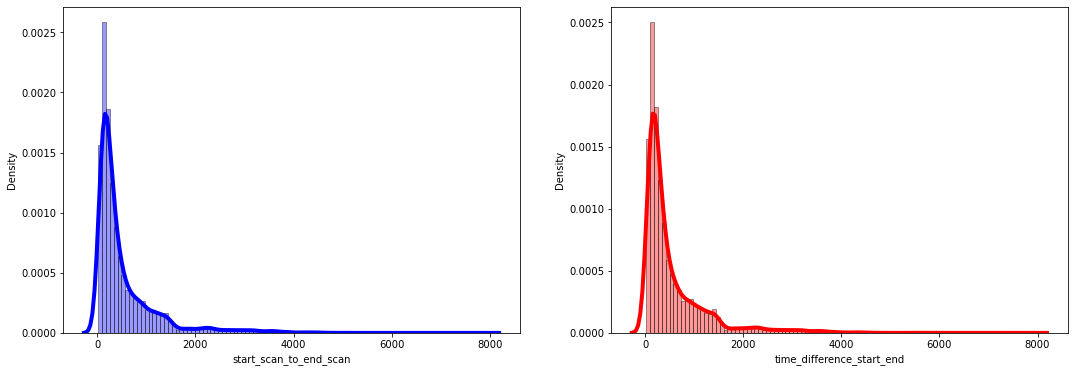

In [226]:
plt.figure(figsize=(18,6))
           
plt.subplot(1,2,1)
sns.distplot(data['start_scan_to_end_scan'], color='blue', hist=True, bins=100, hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})

plt.subplot(1,2,2)
sns.distplot(data['time_difference_start_end'], color='red', hist=True, bins=100, hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
plt.show()

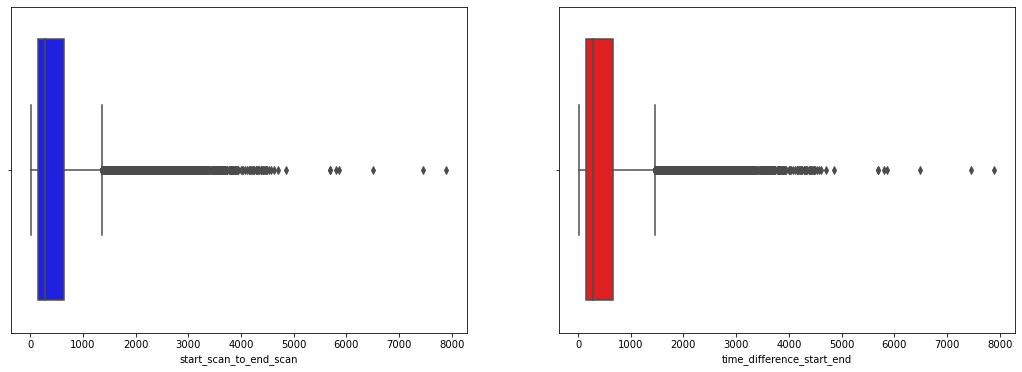

In [227]:
plt.figure(figsize=(18,6))
           
plt.subplot(1,2,1)
sns.boxplot(data['start_scan_to_end_scan'], color='blue')

plt.subplot(1,2,2)
sns.boxplot(data['time_difference_start_end'], color='red')
plt.show()

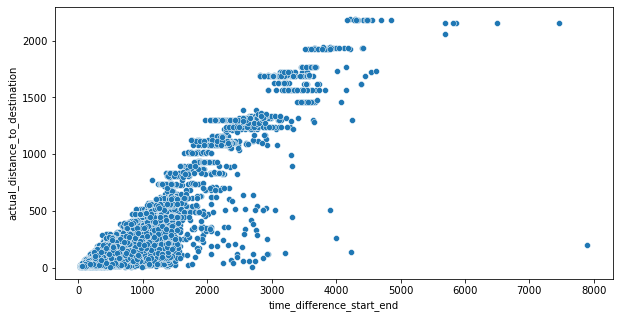

In [228]:
sns.scatterplot(x=data['time_difference_start_end'], y=data['actual_distance_to_destination'])
plt.show()                                                

`Range of both features are from 0 to 8000`

`Remove the extreme right skewed values with IQR method`

In [229]:
data['time_difference_start_end'].mean(), data['time_difference_start_end'].median()

(546.1381828633248, 287.42)

In [230]:
Q1_scan = data['time_difference_start_end'].quantile(0.25)
Q3_scan = data['time_difference_start_end'].quantile(0.75)
IQR_scan = Q3_scan - Q1_scan

In [231]:
lower_limit_scan = Q1_scan - 1.5 * IQR_scan
upper_limit_scan = Q3_scan + 1.5 * IQR_scan
lower_limit_scan, upper_limit_scan

(-628.6424999999999, 1450.2174999999997)

In [232]:
data[(data['time_difference_start_end'] < lower_limit_scan) | (data['time_difference_start_end'] > upper_limit_scan)].shape

(1115, 23)

`As no of rows are less than 10%, we can remove these rows`

In [233]:
data2 = data[(data['time_difference_start_end'] > lower_limit_scan) & (data['time_difference_start_end'] < upper_limit_scan)]
data2.reset_index(drop=True, inplace=True)
data.shape, data2.shape

((14787, 23), (13672, 23))

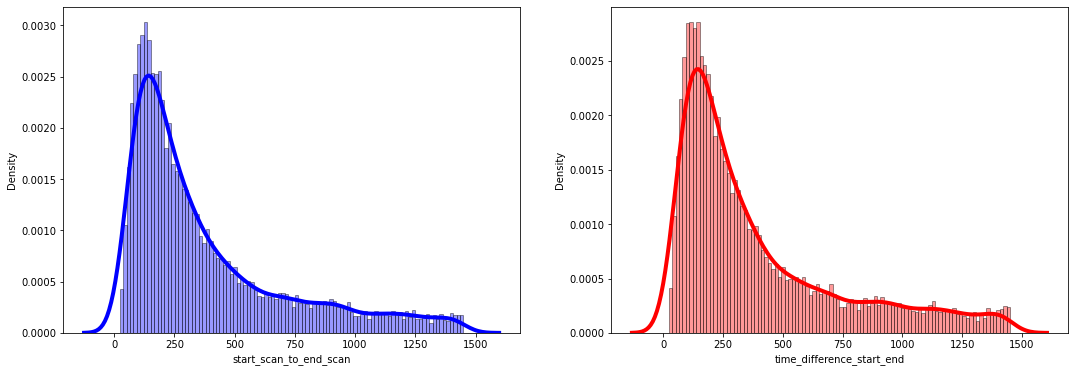

In [234]:
plt.figure(figsize=(18,6))
           
plt.subplot(1,2,1)
sns.distplot(data2['start_scan_to_end_scan'], color='blue', hist=True, bins=100, hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})

plt.subplot(1,2,2)
sns.distplot(data2['time_difference_start_end'], color='red', hist=True, bins=100, hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
plt.show()

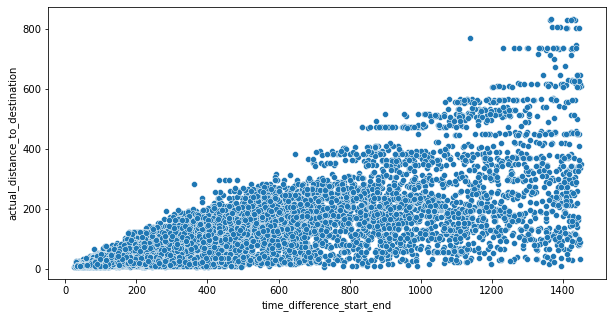

In [235]:
sns.scatterplot(x=data2['time_difference_start_end'], y=data2['actual_distance_to_destination'])
plt.show()                                                

In [236]:
data2['time_difference_start_end'].mean(), data2['time_difference_start_end'].median()

(393.21043153891105, 258.89)

`After removing outliers from features, new ranges are till 1500.`

#### actual_distance_to_destination, osrm_distance and segment_osrm_distance
`all three features are representing same information only.`

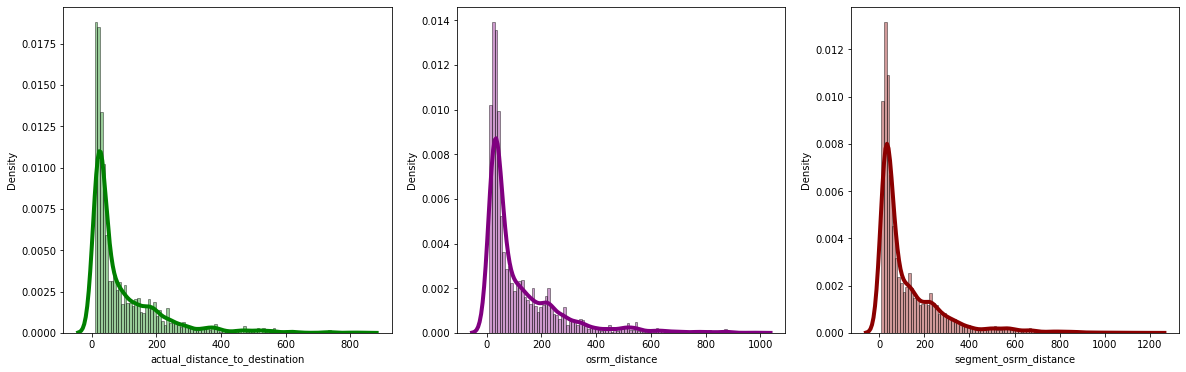

In [237]:
plt.figure(figsize=(20,6))
           
plt.subplot(1,3,1)
sns.distplot(data2['actual_distance_to_destination'], color='green', hist=True, bins=100, hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})

plt.subplot(1,3,2)
sns.distplot(data2['osrm_distance'], color='purple', hist=True, bins=100, hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})

plt.subplot(1,3,3)
sns.distplot(data2['segment_osrm_distance'], color='darkred', hist=True, bins=100, hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})

plt.show()

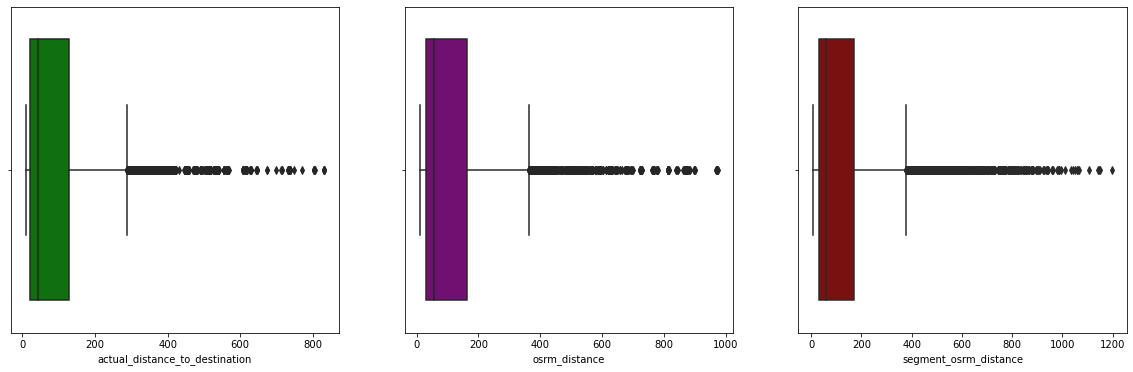

In [238]:
plt.figure(figsize=(20,6))
           
plt.subplot(1,3,1)
sns.boxplot(data2['actual_distance_to_destination'], color='green')

plt.subplot(1,3,2)
sns.boxplot(data2['osrm_distance'], color='purple')

plt.subplot(1,3,3)
sns.boxplot(data2['segment_osrm_distance'], color='darkred')
plt.show()

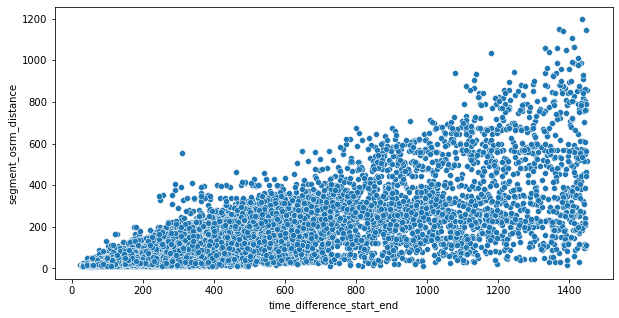

In [239]:
sns.scatterplot(x=data2['time_difference_start_end'], y=data2['segment_osrm_distance'])
plt.show()                                                

`Ranges for all three variables are till 800,1000 and 1200 respectively.`

`Handle outliers with IQR method`

`Taking segment_osrm_distance feature as range is high compare to other two features.`

In [240]:
data2['segment_osrm_distance'].mean(), data2['segment_osrm_distance'].median()

(126.44981129315357, 60.945)

In [241]:
Q1_distance = data2['segment_osrm_distance'].quantile(0.25)
Q3_distance = data2['segment_osrm_distance'].quantile(0.75)
IQR_distance = Q3_distance - Q1_distance

In [242]:
lower_limit_distance = Q1_distance - 1.5 * IQR_distance
upper_limit_distance = Q3_distance + 1.5 * IQR_distance
lower_limit_distance, upper_limit_distance

(-178.015, 378.66499999999996)

In [243]:
data2[(data2['segment_osrm_distance'] < lower_limit_distance) | (data2['segment_osrm_distance'] > upper_limit_distance)].shape

(883, 23)

In [244]:
data3 = data2[(data2['segment_osrm_distance'] > lower_limit_distance) & (data2['segment_osrm_distance'] < upper_limit_distance)]
data3.reset_index(drop=True, inplace=True)
data3.shape

(12789, 23)

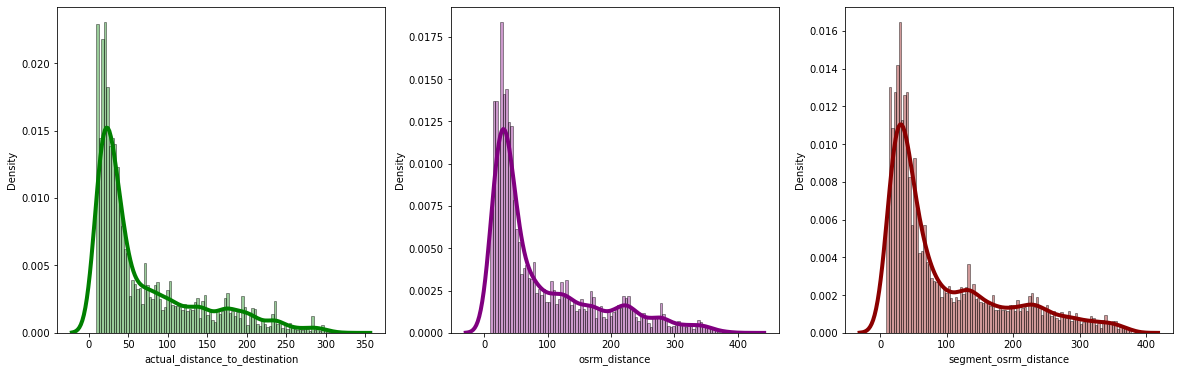

In [245]:
plt.figure(figsize=(20,6))
           
plt.subplot(1,3,1)
sns.distplot(data3['actual_distance_to_destination'], color='green', hist=True, bins=100, hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})

plt.subplot(1,3,2)
sns.distplot(data3['osrm_distance'], color='purple', hist=True, bins=100, hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})

plt.subplot(1,3,3)
sns.distplot(data3['segment_osrm_distance'], color='darkred', hist=True, bins=100, hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})

plt.show()

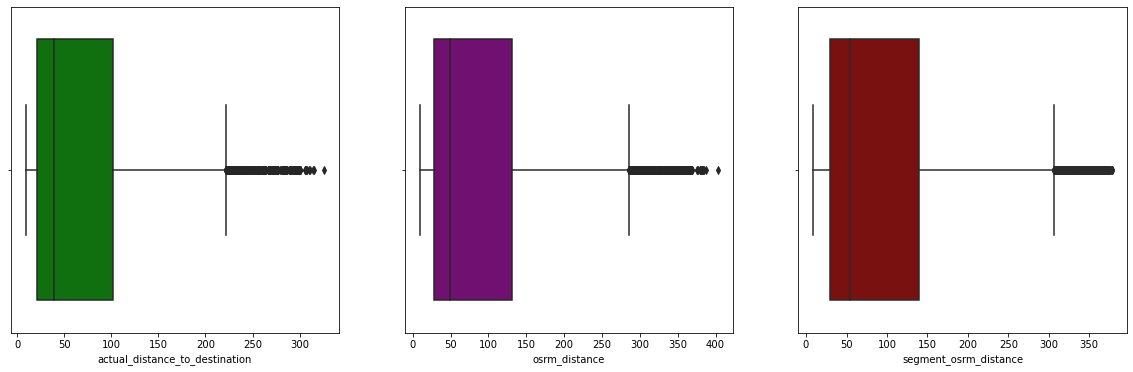

In [246]:
plt.figure(figsize=(20,6))
           
plt.subplot(1,3,1)
sns.boxplot(data3['actual_distance_to_destination'], color='green')

plt.subplot(1,3,2)
sns.boxplot(data3['osrm_distance'], color='purple')

plt.subplot(1,3,3)
sns.boxplot(data3['segment_osrm_distance'], color='darkred')
plt.show()

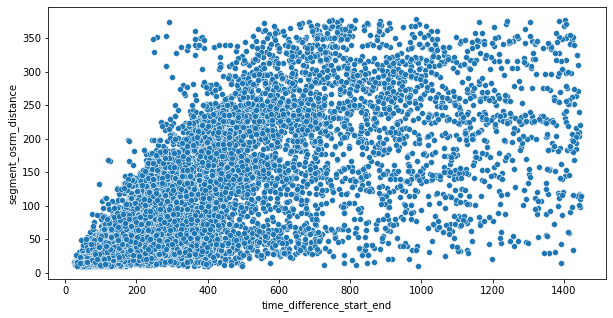

In [247]:
sns.scatterplot(x=data3['time_difference_start_end'], y=data3['segment_osrm_distance'])
plt.show()                                                

In [248]:
data3.sample(5)

data route_type  start_scan_to_end_scan  \
4512   training        FTL                   302.0   
11525      test    Carting                    79.0   
4179   training    Carting                   189.0   
12725      test    Carting                   730.0   
12023      test        FTL                   413.0   

       actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
4512                           100.94        207.0       95.0         123.07   
11525                           15.84         60.0       16.0          18.16   
4179                            37.78        102.0       36.0          45.50   
12725                          125.59        220.0      131.0         143.92   
12023                          196.11        282.0      167.0         220.48   

       segment_actual_time  segment_osrm_time  segment_osrm_distance  \
4512                 205.0              109.0                 126.12   
11525                 60.0               17.0                  19.94   
4179                 100.0               37.0                  48.93   
12725                216.0              131.0                 148.98   
12023                280.0              178.0                 225.78   

      source_city source_place source_code source_state destination_city  \
4512         Pune     Tathawde           H  Maharashtra         Bhiwandi   
11525      Mumbai          Hub          HB  Maharashtra           Mumbai   
4179          MAA  Poonamallee          HB   Tamil Nadu          Chennai   
12725     Tirupur      Koliplm           I   Tamil Nadu          Tirupur   
12023     Gurgaon     Bilaspur          HB      Haryana           Jaipur   

      destination_place destination_code destination_state  trip_year  \
4512            Mankoli               HB       Maharashtra       2018   
11525       CottonGreen              DPC       Maharashtra       2018   
4179             Egmore              DPC        Tamil Nadu       2018   
12725           Koliplm                I        Tamil Nadu       2018   
12023             RIICO                L         Rajasthan       2018   

      trip_month  trip_day trip_day_name  time_difference_start_end  
4512   September        19     Wednesday                     302.88  
11525    October         1        Monday                      79.37  
4179   September        18       Tuesday                     189.22  
12725    October         3     Wednesday                     732.85  
12023    October         2       Tuesday                     413.79

In [249]:
data3[data3['segment_osrm_distance']>350][['actual_distance_to_destination','osrm_distance', 'segment_osrm_distance']].sample(5)

actual_distance_to_destination  osrm_distance  segment_osrm_distance
395                           291.03         352.18                 352.18
8020                          290.75         336.90                 377.35
583                           275.50         355.27                 356.37
2504                          189.76         241.52                 352.05
641                           283.30         334.21                 361.04

In [250]:
data3['segment_osrm_distance'].mean(), data3['segment_osrm_distance'].median(), data3['actual_distance_to_destination'].mean(), data3['actual_distance_to_destination'].median()


(95.45972476346859, 54.28, 70.67272265227936, 38.71)

`new ranges after removing outliers are near 400 for all three also boxplot ranges look fine.`

#### actual_time, osrm_time, segment_actual_time, segment_osrm_time

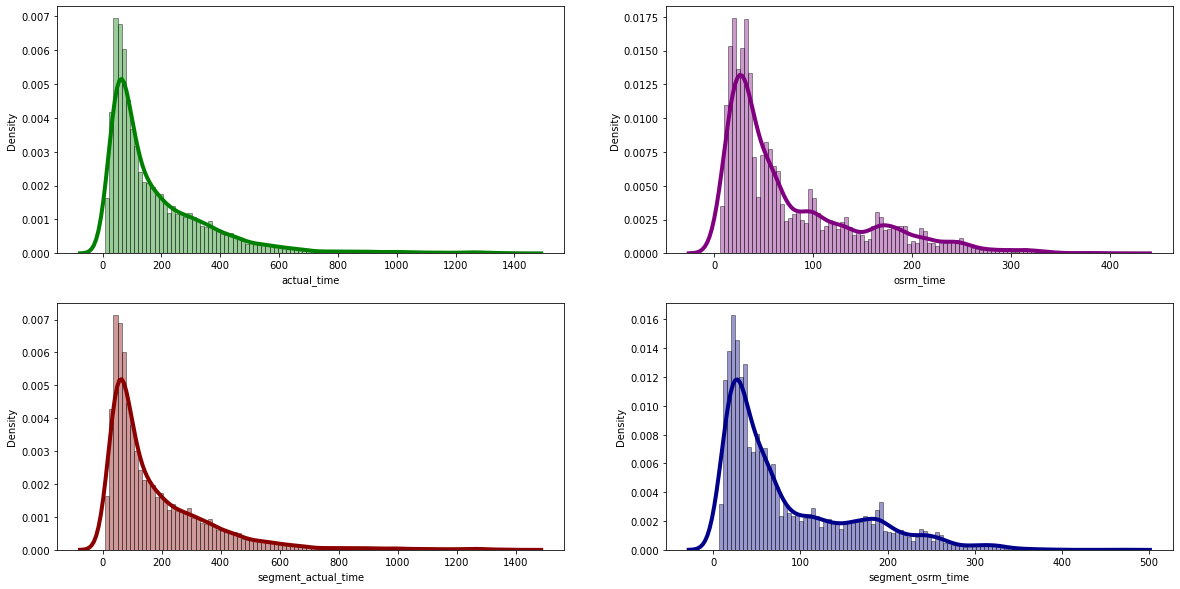

In [251]:
plt.figure(figsize=(20,10))
           
plt.subplot(2,2,1)
sns.distplot(data3['actual_time'], color='green', hist=True, bins=100, hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})

plt.subplot(2,2,2)
sns.distplot(data3['osrm_time'], color='purple', hist=True, bins=100, hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})

plt.subplot(2,2,3)
sns.distplot(data3['segment_actual_time'], color='darkred', hist=True, bins=100, hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})

plt.subplot(2,2,4)
sns.distplot(data3['segment_osrm_time'], color='darkblue', hist=True, bins=100, hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})

plt.show()

`All four features have different range. 1. actual time: 0-1400+, 2. osrm_time: 0-400+, 3. segment_actual_time: 0-1400+ and 4. segment_osrm_time: 0-500+`

`actual time and segment_actual_time are comparable and osrm_time and segment_osrm_time are comparable by range.`

#### actual time and segment_actual_time

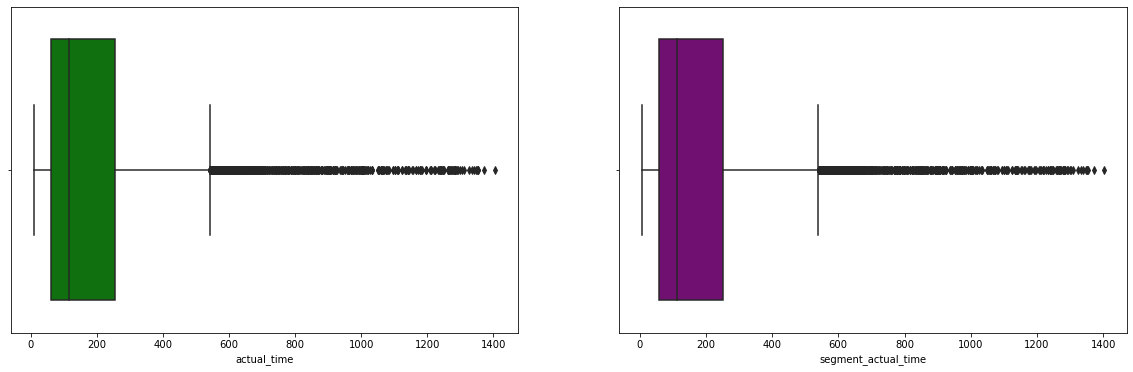

In [252]:
plt.figure(figsize=(20,6))
           
plt.subplot(1,2,1)
sns.boxplot(data3['actual_time'], color='green')

plt.subplot(1,2,2)
sns.boxplot(data3['segment_actual_time'], color='purple')

plt.show()

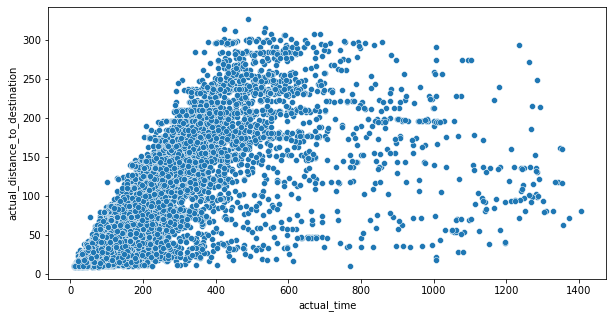

In [253]:
sns.scatterplot(x=data3['actual_time'], y=data3['actual_distance_to_destination'])
plt.show()                                                

In [254]:
data3['actual_time'].mean(), data3['actual_time'].median()

(187.33348971772617, 115.0)

In [255]:
Q1_time = data3['actual_time'].quantile(0.25)
Q3_time = data3['actual_time'].quantile(0.75)
IQR_time = Q3_time - Q1_time

In [256]:
lower_limit_time = Q1_time - 1.5 * IQR_time
upper_limit_time = Q3_time + 1.5 * IQR_time
lower_limit_time, upper_limit_time

(-228.5, 543.5)

In [257]:
data3[(data3['actual_time'] < lower_limit_time) | (data3['actual_time'] > upper_limit_time)].shape

(664, 23)

In [258]:
data4 = data3[(data3['actual_time'] > lower_limit_time) & (data3['actual_time'] < upper_limit_time)]
data4.reset_index(drop=True, inplace=True)
data4.shape

(12125, 23)

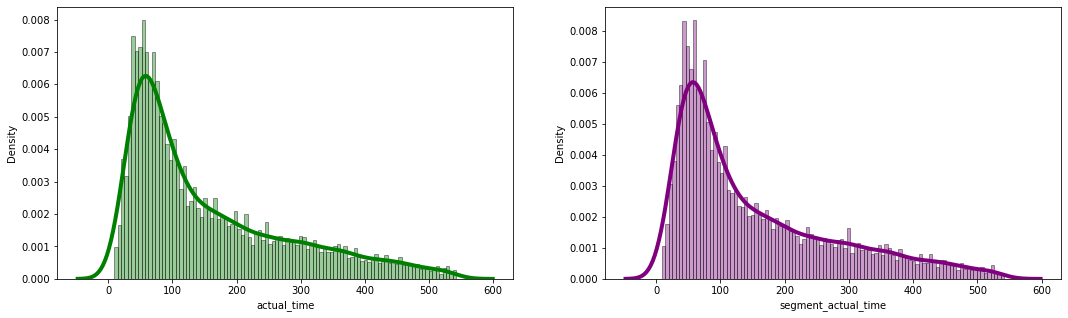

In [259]:
plt.figure(figsize=(18,5))
           
plt.subplot(1,2,1)
sns.distplot(data4['actual_time'], color='green', hist=True, bins=100, hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})

plt.subplot(1,2,2)
sns.distplot(data4['segment_actual_time'], color='purple', hist=True, bins=100, hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})

plt.show()

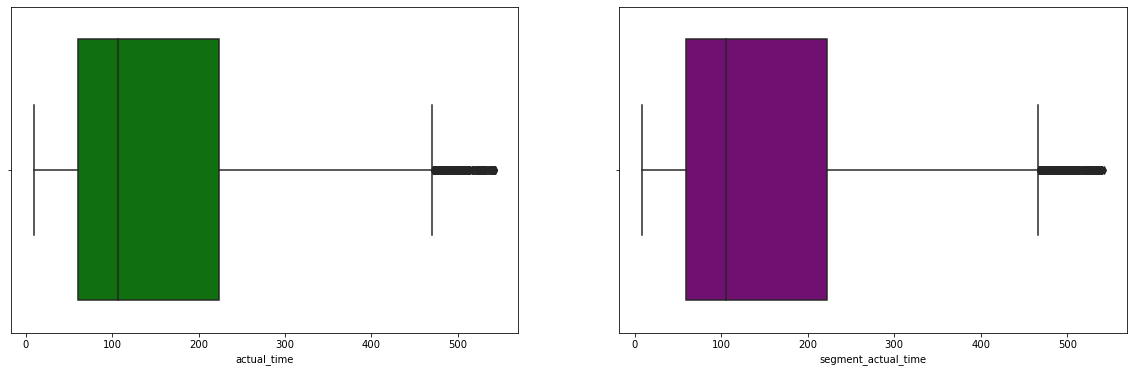

In [260]:
plt.figure(figsize=(20,6))
           
plt.subplot(1,2,1)
sns.boxplot(data4['actual_time'], color='green')

plt.subplot(1,2,2)
sns.boxplot(data4['segment_actual_time'], color='purple')

plt.show()

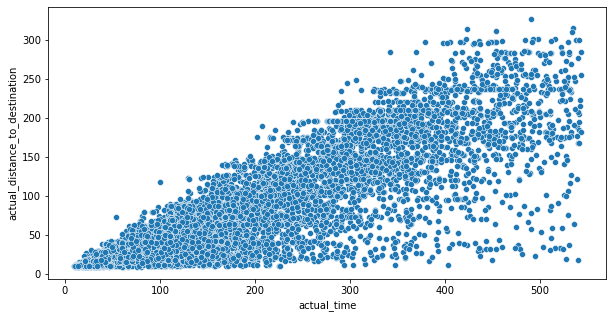

In [261]:
sns.scatterplot(x=data4['actual_time'], y=data4['actual_distance_to_destination'])
plt.show()                                                

In [262]:
data4['actual_time'].mean(), data4['actual_time'].median()

(155.24148453608248, 107.0)

#### osrm_time and segment_osrm_time

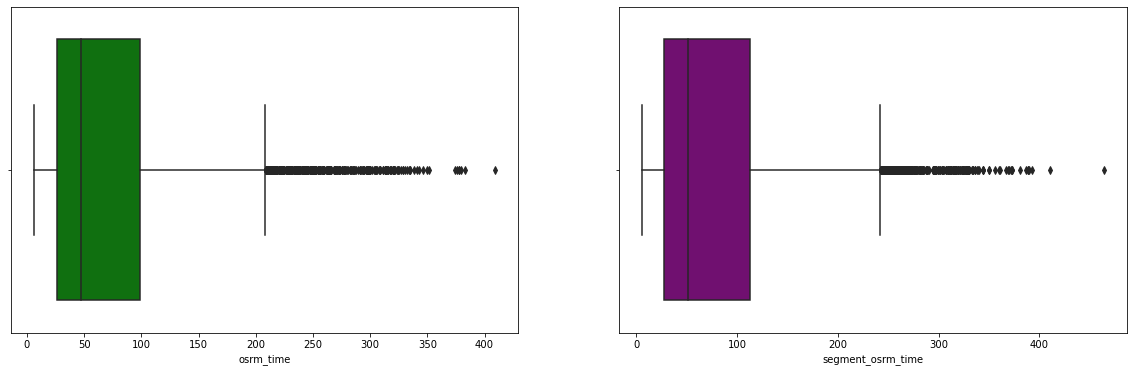

In [263]:
plt.figure(figsize=(20,6))
           
plt.subplot(1,2,1)
sns.boxplot(data4['osrm_time'], color='green')

plt.subplot(1,2,2)
sns.boxplot(data4['segment_osrm_time'], color='purple')

plt.show()

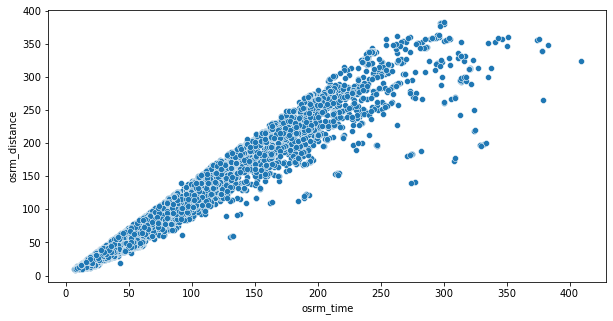

In [264]:
sns.scatterplot(x=data4['osrm_time'], y=data4['osrm_distance'])
plt.show()                                                

In [265]:
data4['segment_osrm_time'].mean(), data4['segment_osrm_time'].median()

(77.53418556701031, 51.0)

In [266]:
Q1_time2 = data4['segment_osrm_time'].quantile(0.25)
Q3_time2 = data4['segment_osrm_time'].quantile(0.75)
IQR_time2 = Q3_time2 - Q1_time2

In [267]:
lower_limit_time2 = Q1_time2 - 1.5 * IQR_time2
upper_limit_time2 = Q3_time2 + 1.5 * IQR_time2
lower_limit_time2, upper_limit_time2

(-102.0, 242.0)

In [268]:
data4[(data4['segment_osrm_time'] < lower_limit_time2) | (data4['segment_osrm_time'] > upper_limit_time2)].shape

(390, 23)

In [269]:
data5 = data4[(data4['segment_osrm_time'] > lower_limit_time2) & (data4['segment_osrm_time'] < upper_limit_time2)]
data5.reset_index(drop=True, inplace=True)
data5.shape

(11727, 23)

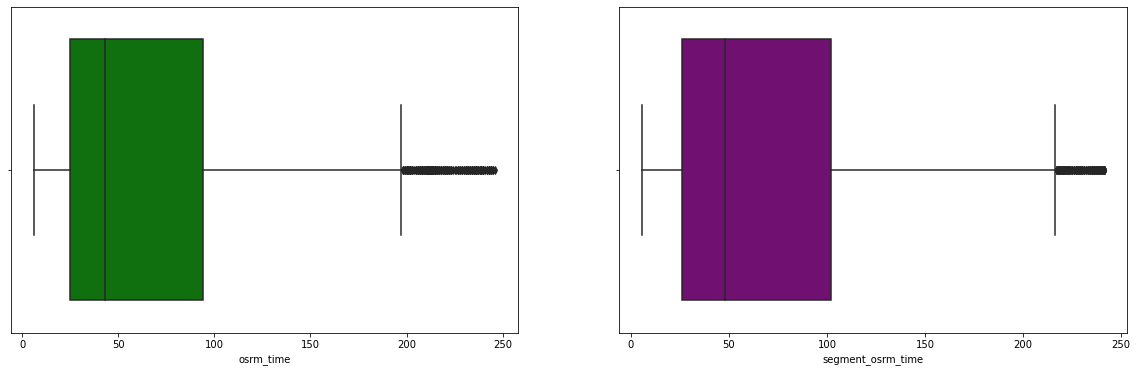

In [270]:
plt.figure(figsize=(20,6))
           
plt.subplot(1,2,1)
sns.boxplot(data5['osrm_time'], color='green')

plt.subplot(1,2,2)
sns.boxplot(data5['segment_osrm_time'], color='purple')

plt.show()

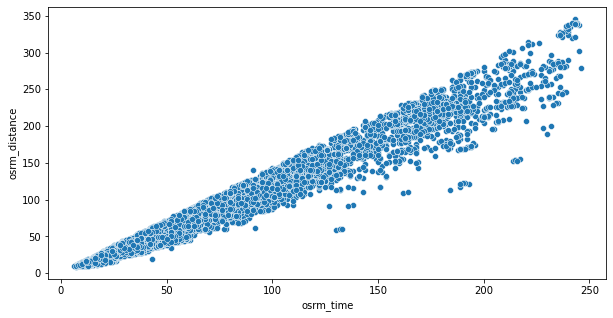

In [271]:
sns.scatterplot(x=data5['osrm_time'], y=data5['osrm_distance'])
plt.show()                                                

`Lets plot box plots for all numerical features.`

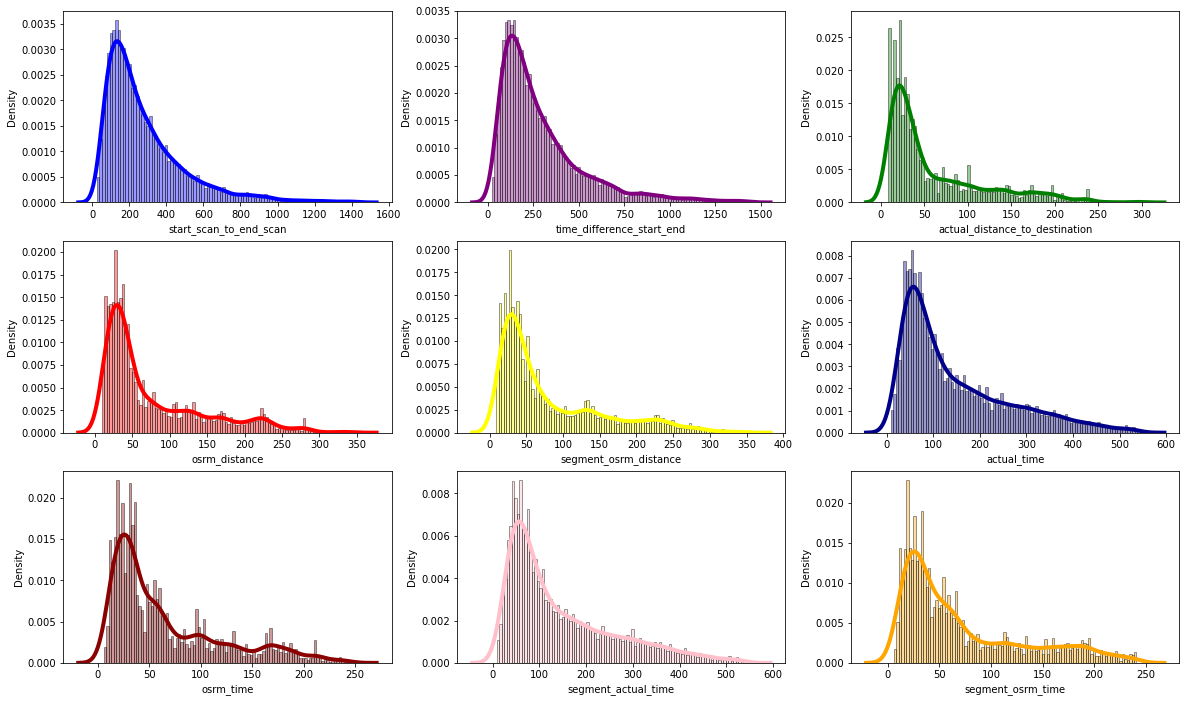

In [272]:
plt.figure(figsize=(20,12))
           
plt.subplot(3,3,1)
sns.distplot(data5['start_scan_to_end_scan'], color='blue', hist=True, bins=100, hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})

plt.subplot(3,3,2)
sns.distplot(data5['time_difference_start_end'], color='purple', hist=True, bins=100, hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})

plt.subplot(3,3,3)
sns.distplot(data5['actual_distance_to_destination'], color='green', hist=True, bins=100, hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})

plt.subplot(3,3,4)
sns.distplot(data5['osrm_distance'], color='red', hist=True, bins=100, hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})

plt.subplot(3,3,5)
sns.distplot(data5['segment_osrm_distance'], color='yellow', hist=True, bins=100, hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})

plt.subplot(3,3,6)
sns.distplot(data5['actual_time'], color='darkblue', hist=True, bins=100, hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})

plt.subplot(3,3,7)
sns.distplot(data5['osrm_time'], color='darkred', hist=True, bins=100, hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})

plt.subplot(3,3,8)
sns.distplot(data5['segment_actual_time'], color='pink', hist=True, bins=100, hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})

plt.subplot(3,3,9)
sns.distplot(data5['segment_osrm_time'], color='orange', hist=True, bins=100, hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})


plt.show()

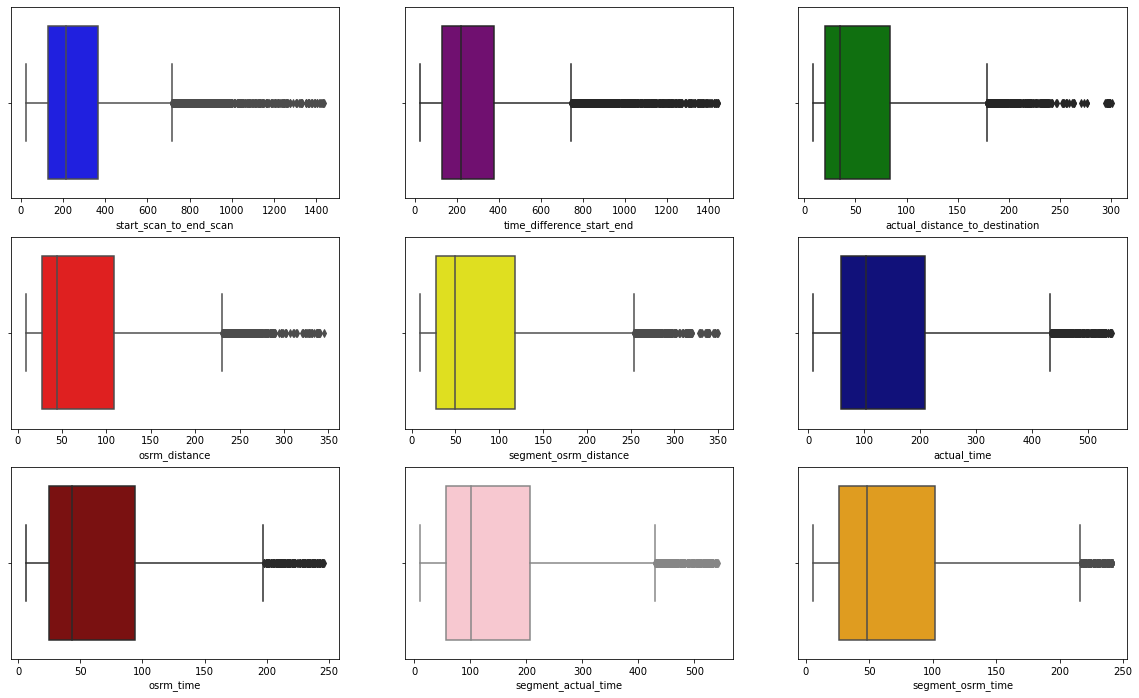

In [273]:
plt.figure(figsize=(20,12))
           
plt.subplot(3,3,1)
sns.boxplot(data5['start_scan_to_end_scan'], color='blue')

plt.subplot(3,3,2)
sns.boxplot(data5['time_difference_start_end'], color='purple')

plt.subplot(3,3,3)
sns.boxplot(data5['actual_distance_to_destination'], color='green')

plt.subplot(3,3,4)
sns.boxplot(data5['osrm_distance'], color='red')

plt.subplot(3,3,5)
sns.boxplot(data5['segment_osrm_distance'], color='yellow')

plt.subplot(3,3,6)
sns.boxplot(data5['actual_time'], color='darkblue')

plt.subplot(3,3,7)
sns.boxplot(data5['osrm_time'], color='darkred')

plt.subplot(3,3,8)
sns.boxplot(data5['segment_actual_time'], color='pink')

plt.subplot(3,3,9)
sns.boxplot(data5['segment_osrm_time'], color='orange')


plt.show()

`All numerical features looks fine now and ranges are also acceptable.`

In [274]:
final_data = data5.copy()
print(final_data.shape)
final_data.head()

(11727, 23)


data route_type  start_scan_to_end_scan  \
0  training    Carting                   180.0   
1  training    Carting                   100.0   
2  training        FTL                   717.0   
3  training    Carting                   189.0   
4  training    Carting                    98.0   

   actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                           73.19        143.0       68.0          85.11   
1                           17.18         59.0       15.0          19.68   
2                          127.45        341.0      117.0         146.79   
3                           24.60         61.0       23.0          28.06   
4                            9.10         24.0       13.0          12.02   

   segment_actual_time  segment_osrm_time  segment_osrm_distance source_city  \
0                141.0               65.0                  84.19      Tumkur   
1                 59.0               16.0                  19.88      Mumbai   
2                340.0              115.0                 146.79     Bellary   
3                 60.0               23.0                  28.06     Chennai   
4                 24.0               13.0                  12.02     Chennai   

  source_place source_code source_state destination_city destination_place  \
0     Veersagr           I    Karnataka       Chikblapur          ShntiSgr   
1          Hub          HB  Maharashtra           Mumbai            MiraRd   
2           Dc          HB    Karnataka          Bellary                Dc   
3        Porur         DPC   Tamil Nadu          Chennai  Sriperumbudur Dc   
4     Chrompet         DPC   Tamil Nadu          Chennai       Vandalur Dc   

  destination_code destination_state  trip_year trip_month  trip_day  \
0                D         Karnataka       2018  September        12   
1               IP       Maharashtra       2018  September        12   
2                H         Karnataka       2018  September        12   
3               HB        Tamil Nadu       2018  September        12   
4               HB        Tamil Nadu       2018  September        12   

  trip_day_name  time_difference_start_end  
0     Wednesday                     181.61  
1     Wednesday                     100.49  
2     Wednesday                     718.35  
3     Wednesday                     190.49  
4     Wednesday                      98.01

### Categorical Features

In [275]:
final_data.data.value_counts()

training    8347
test        3380
Name: data, dtype: int64

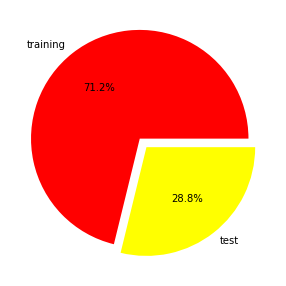

In [276]:
plt.pie(final_data.data.value_counts(), explode=(0.05,0.05), labels=final_data.data.value_counts().index, colors=['red','yellow'],autopct='%.1f%%')
plt.show()

`training-testing data ratio is maintained around 71%-29%.`

In [277]:
final_data.route_type.value_counts()

Carting    8646
FTL        3081
Name: route_type, dtype: int64

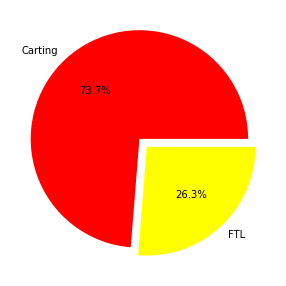

In [278]:
plt.pie(final_data.route_type.value_counts(), explode=(0.05,0.05), labels=final_data.route_type.value_counts().index, colors=['red','yellow'],autopct='%.1f%%')
plt.show()

`Top route type is carting with 74%`

In [279]:
final_data.trip_year.value_counts()

2018    11727
Name: trip_year, dtype: int64

`We have only 2018 year data`

In [280]:
final_data.trip_month.value_counts()

September    10287
October       1440
Name: trip_month, dtype: int64

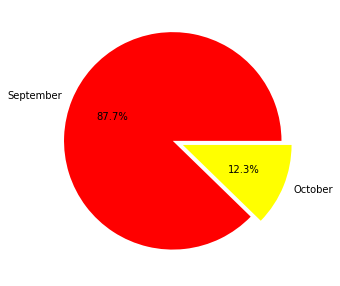

In [281]:
plt.pie(final_data.trip_month.value_counts(), explode=(0.05,0.05), labels=final_data.trip_month.value_counts().index, colors=['red','yellow'],autopct='%.1f%%')
plt.show()

`Only two months are available in dataset - sep and oct where sep is on top with ~88%`

In [282]:
final_data.trip_day.value_counts()

18    635
15    624
13    606
12    582
21    573
22    571
14    567
17    561
20    548
19    542
25    541
26    535
27    535
24    521
3     510
28    501
29    499
23    483
1     482
16    458
2     448
30    405
Name: trip_day, dtype: int64

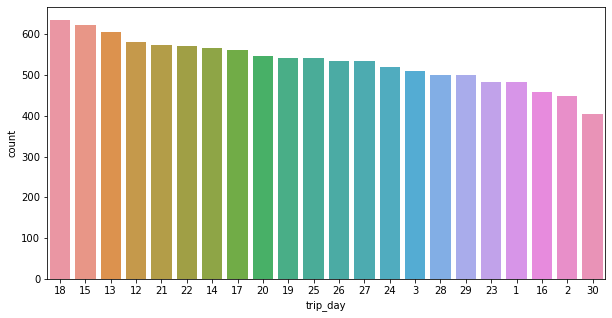

In [283]:
sns.countplot(data=final_data, x='trip_day', order=final_data.trip_day.value_counts().index)
plt.show()

`Almost all days have same frequency but between 18,15,13 and 12th day of month has max freq so means mid of the month.`

In [284]:
final_data.trip_day_name.value_counts()

Wednesday    2169
Saturday     1694
Thursday     1689
Friday       1641
Tuesday      1624
Monday       1564
Sunday       1346
Name: trip_day_name, dtype: int64

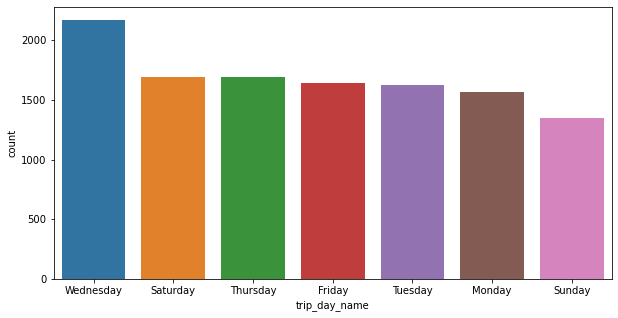

In [285]:
sns.countplot(data=final_data, x='trip_day_name', order=final_data.trip_day_name.value_counts().index)
plt.show()

`Wednesday has the max frequency around 2200.`

In [286]:
final_data.source_state.nunique()

28

In [287]:
final_data.source_state.value_counts()

Maharashtra               2252
Karnataka                 1912
Haryana                   1273
Tamil Nadu                 960
Delhi                      640
Telangana                  617
Gujarat                    612
Uttar Pradesh              525
West Bengal                509
Punjab                     478
Rajasthan                  368
Andhra Pradesh             354
Kerala                     231
Bihar                      205
Madhya Pradesh             187
Assam                      180
Jharkhand                  111
Orissa                      84
Uttarakhand                 70
Chandigarh                  48
Chhattisgarh                42
Goa                         21
Dadra and Nagar Haveli      15
Jammu & Kashmir             13
Himachal Pradesh             8
Pondicherry                  5
Nagaland                     4
Arunachal Pradesh            3
Name: source_state, dtype: int64

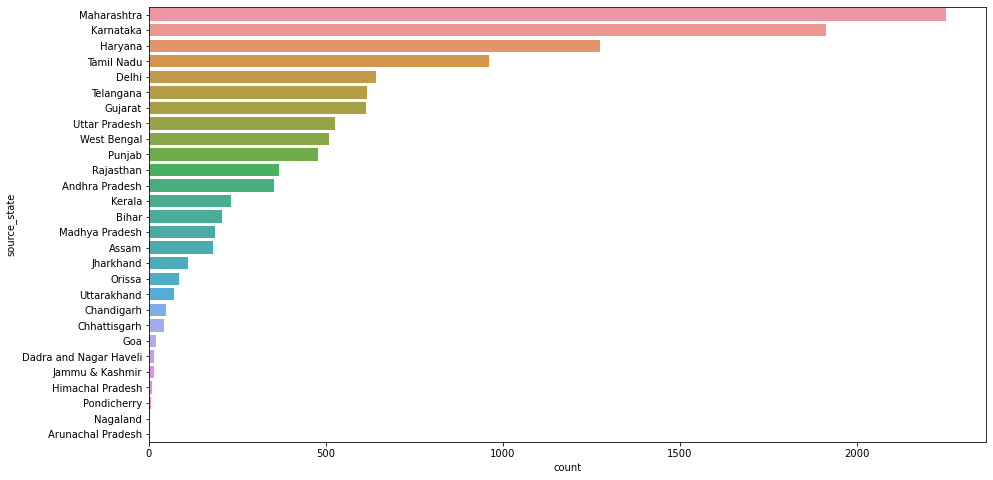

In [288]:
plt.figure(figsize=(15,8))
sns.countplot(data=final_data, y='source_state', order=final_data.source_state.value_counts().index)
plt.show()

In [289]:
final_data.destination_state.nunique()

31

In [290]:
final_data.destination_state.value_counts()

Maharashtra               2237
Karnataka                 1929
Haryana                   1261
Tamil Nadu                 956
Telangana                  605
Gujarat                    604
Delhi                      557
Punjab                     538
Uttar Pradesh              529
West Bengal                516
Rajasthan                  395
Andhra Pradesh             346
Kerala                     233
Madhya Pradesh             214
Bihar                      205
Assam                      155
Jharkhand                  111
Uttarakhand                 80
Orissa                      78
Chhattisgarh                42
Chandigarh                  29
Goa                         27
Arunachal Pradesh           21
Dadra and Nagar Haveli      17
Himachal Pradesh            14
Jammu & Kashmir             13
Meghalaya                    8
Pondicherry                  3
Mizoram                      2
Nagaland                     1
Daman & Diu                  1
Name: destination_state, dtype: int64

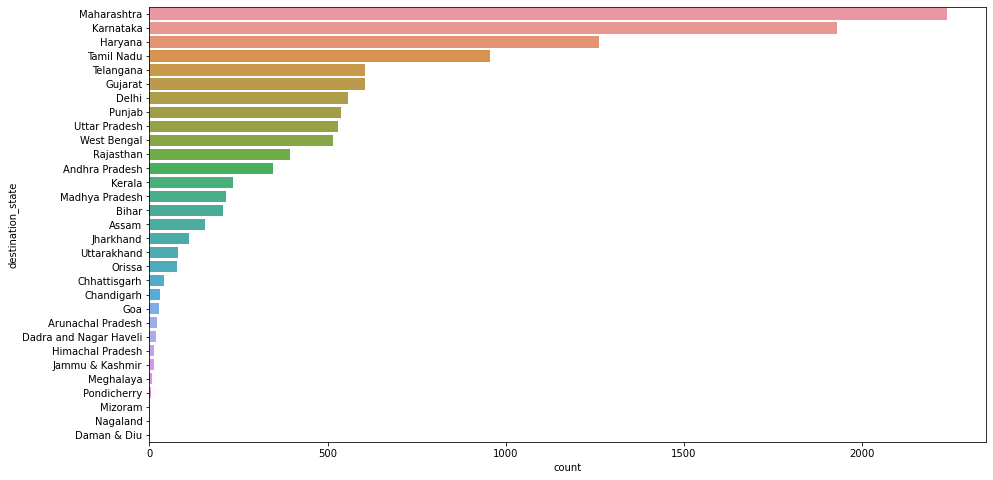

In [291]:
plt.figure(figsize=(15,8))
sns.countplot(data=final_data, y='destination_state', order=final_data.destination_state.value_counts().index)
plt.show()

`Top 3 states are Maharashtra, Karnataka and Haryana where total for source are 28 and 31 for destination`

In [292]:
final_data.source_city.value_counts().index[:40], final_data.destination_city.value_counts().index[:40]

(Index(['Bengaluru', 'Mumbai', 'Gurgaon', 'Bhiwandi', 'Bangalore', 'Delhi',
        'Hyderabad', 'Pune', 'Chennai', 'Chandigarh', 'MAA', 'Kolkata',
        'Ahmedabad', 'Sonipat', 'Jaipur', 'Del', 'FBD', 'Noida', 'Ludhiana',
        'Kanpur', 'Surat', 'Bhopal', 'HBR', 'CCU', 'Guwahati', 'Coimbatore',
        'LowerParel', 'PNQ', 'Faridabad', 'Jalandhar', 'Aurangabad',
        'Vijayawada', 'Muzaffrpur', 'Visakhapatnam', 'Aluva', 'Ranchi',
        'Mehsana', 'Hisar', 'Tirunelveli', 'Bhubaneshwar'],
       dtype='object'),
 Index(['Mumbai', 'Bengaluru', 'Gurgaon', 'Delhi', 'Bhiwandi', 'Hyderabad',
        'Bangalore', 'Chennai', 'Chandigarh', 'Sonipat', 'Pune', 'Jaipur',
        'MAA', 'Kolkata', 'Ahmedabad', 'FBD', 'HBR', 'PNQ', 'CCU', 'Noida',
        'Faridabad', 'Surat', 'Ludhiana', 'Bhopal', 'BLR', 'Coimbatore',
        'Kanpur', 'Del', 'GGN', 'Guwahati', 'Aluva', 'Anand', 'GZB',
        'Aurangabad', 'Karimnagar', 'Mehsana', 'Madurai', 'Ajmer',
        'Visakhapatnam', 'Berhampore'

`In source and destination cities, data has different aliases for same location. Lets replace them.`

In [293]:
final_data['source_city'] = final_data['source_city'].replace({'Bangalore':'Bengaluru', 'Del':'Delhi', 'MAA':'Chennai','FBD':'Faridabad', 'PNQ':'Pune', 
                                                               'HBR':'Bengaluru', 'CCU':'Kolkata', 'BLR':'Bengaluru','GGN':'Gurgaon',
                                                              'GZB':'Ghaziabad'})

final_data['destination_city'] = final_data['destination_city'].replace({'Bangalore':'Bengaluru', 'Del':'Delhi', 'MAA':'Chennai','FBD':'Faridabad', 'PNQ':'Pune', 
                                                               'HBR':'Bengaluru', 'CCU':'Kolkata', 'BLR':'Bengaluru','GGN':'Gurgaon',
                                                              'GZB':'Ghaziabad'})

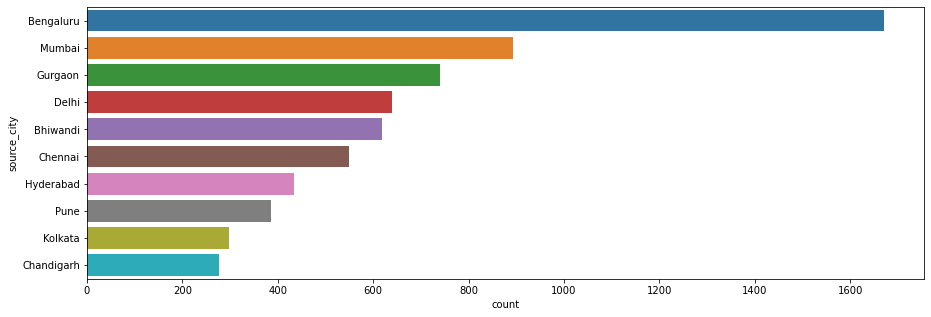

In [294]:
plt.figure(figsize=(15,5))
sns.countplot(data=final_data, y='source_city', order=final_data.source_city.value_counts().index[:10])
plt.show()

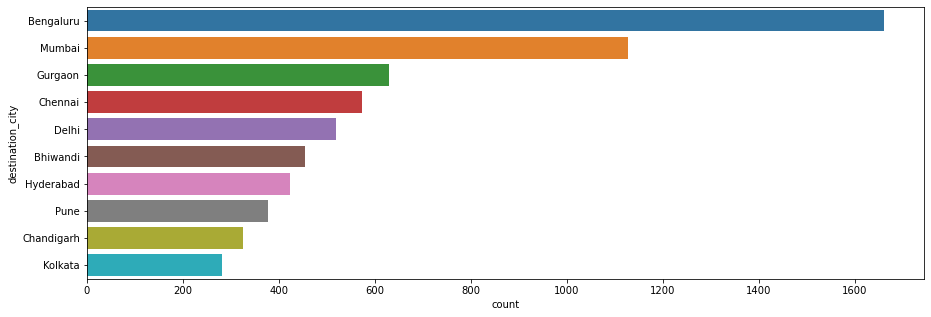

In [295]:
plt.figure(figsize=(15,5))
sns.countplot(data=final_data, y='destination_city', order=final_data.destination_city.value_counts().index[:10])
plt.show()

`Bengaluru, Mumbai and Gurgaon are top cities overall for source and destination both`

`Source top 3 cities-state wise.`

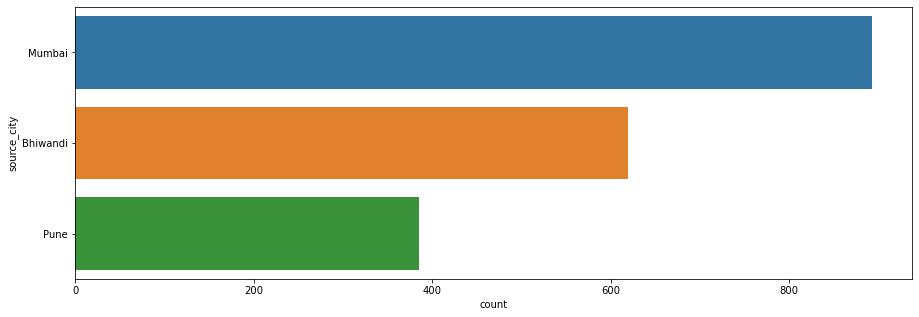

In [296]:
plt.figure(figsize=(15,5))
maha_data = final_data[final_data['source_state']=='Maharashtra']
sns.countplot(data=maha_data, y='source_city', order=maha_data.source_city.value_counts().index[:3])
plt.show()

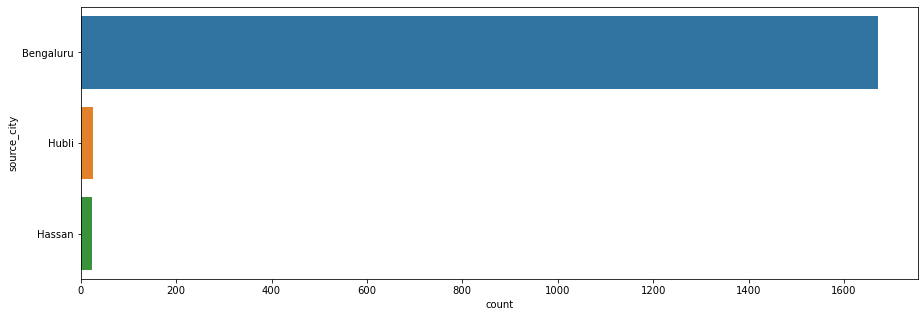

In [297]:
plt.figure(figsize=(15,5))
kar_data = final_data[final_data['source_state']=='Karnataka']
sns.countplot(data=kar_data, y='source_city', order=kar_data.source_city.value_counts().index[:3])
plt.show()

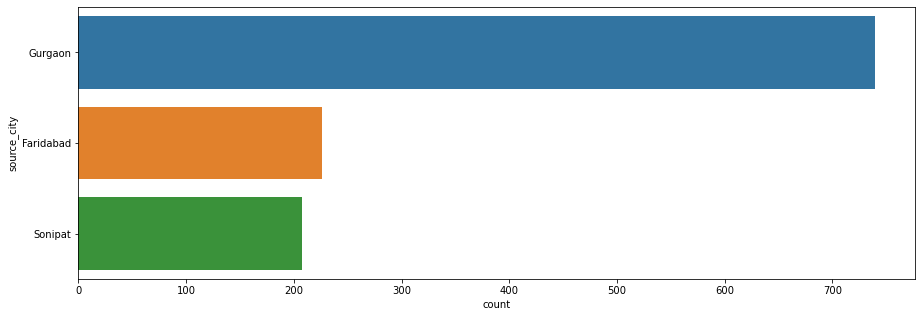

In [298]:
plt.figure(figsize=(15,5))
hr_data = final_data[final_data['source_state']=='Haryana']
sns.countplot(data=hr_data, y='source_city', order=hr_data.source_city.value_counts().index[:3])
plt.show()

`Destination top 3 cities-state wise.`

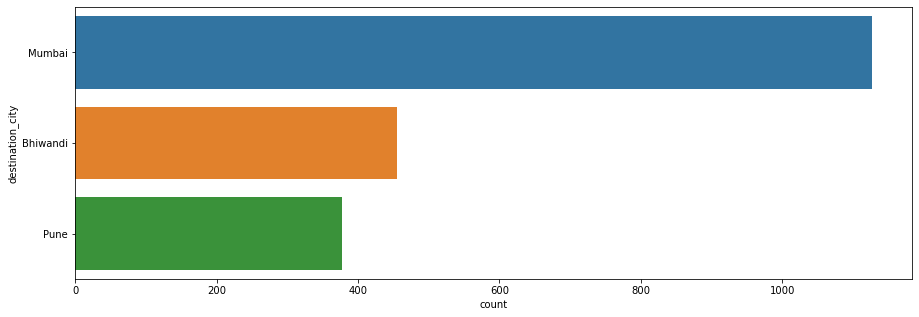

In [299]:
plt.figure(figsize=(15,5))
maha_data2 = final_data[final_data['destination_state']=='Maharashtra']
sns.countplot(data=maha_data2, y='destination_city', order=maha_data2.destination_city.value_counts().index[:3])
plt.show()

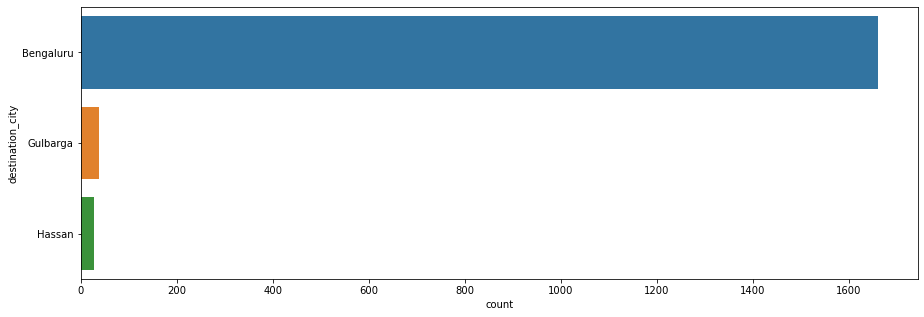

In [300]:
plt.figure(figsize=(15,5))
kar_data2 = final_data[final_data['destination_state']=='Karnataka']
sns.countplot(data=kar_data2, y='destination_city', order=kar_data2.destination_city.value_counts().index[:3])
plt.show()

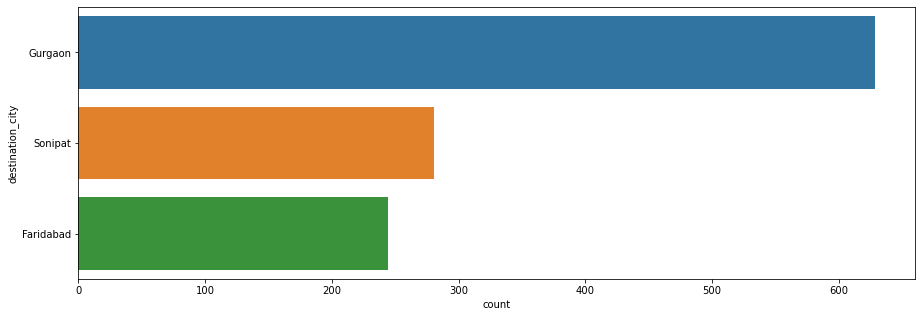

In [301]:
plt.figure(figsize=(15,5))
hr_data2 = final_data[final_data['destination_state']=='Haryana']
sns.countplot(data=hr_data2, y='destination_city', order=hr_data2.destination_city.value_counts().index[:3])
plt.show()

`Source and Destination top three cities state wise are:`

`In Maharashtra: Mumbai, Bhiwandi and Pure are top 3 cities.`

`In Karnataka: only Bengaluru is on top.`

`In Haryana: Gurgaon is on top with max freq followed by faridabad and sonipat.`

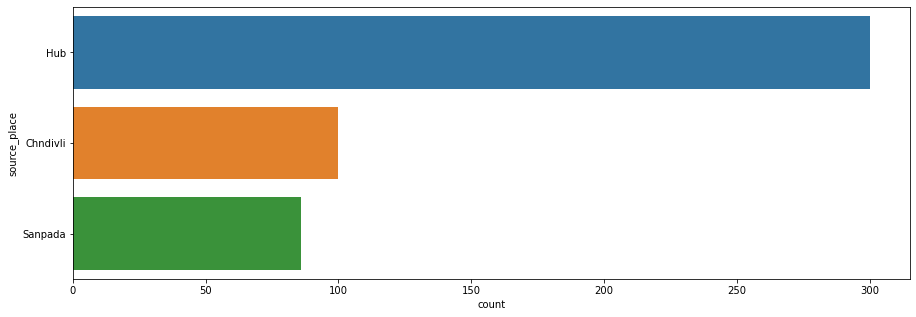

In [302]:
plt.figure(figsize=(15,5))
mum_data = final_data[final_data['source_city']=='Mumbai']
sns.countplot(data=mum_data, y='source_place', order=mum_data.source_place.value_counts().index[:3])
plt.show()

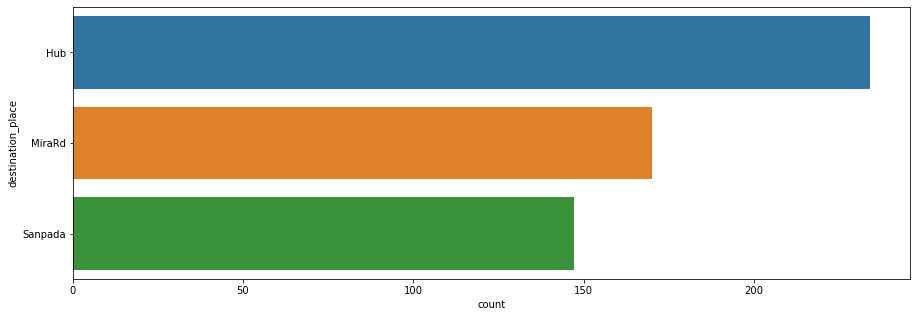

In [303]:
plt.figure(figsize=(15,5))
mum_data2 = final_data[final_data['destination_city']=='Mumbai']
sns.countplot(data=mum_data2, y='destination_place', order=mum_data2.destination_place.value_counts().index[:3])
plt.show()

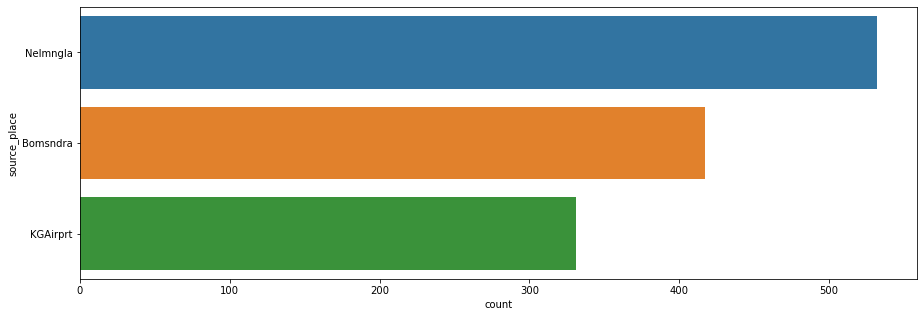

In [304]:
plt.figure(figsize=(15,5))
blr_data = final_data[final_data['source_city']=='Bengaluru']
sns.countplot(data=blr_data, y='source_place', order=blr_data.source_place.value_counts().index[:3])
plt.show()

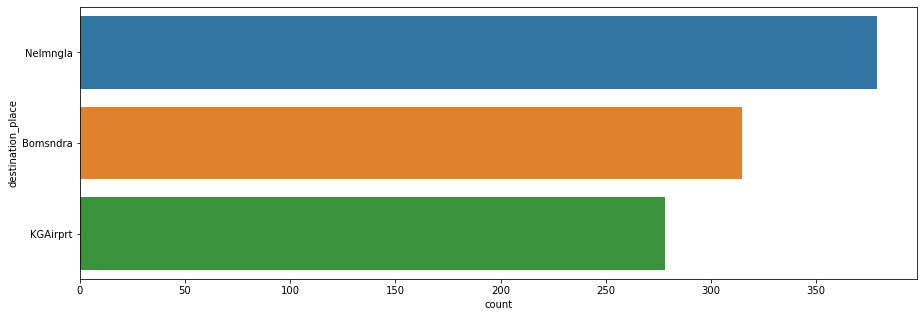

In [305]:
plt.figure(figsize=(15,5))
blr_data2 = final_data[final_data['destination_city']=='Bengaluru']
sns.countplot(data=blr_data2, y='destination_place', order=blr_data2.destination_place.value_counts().index[:3])
plt.show()

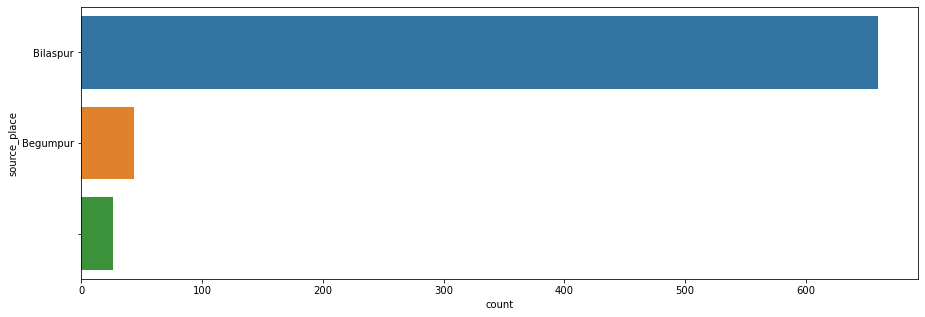

In [306]:
plt.figure(figsize=(15,5))
gur_data = final_data[final_data['source_city']=='Gurgaon']
sns.countplot(data=gur_data, y='source_place', order=gur_data.source_place.value_counts().index[:3])
plt.show()

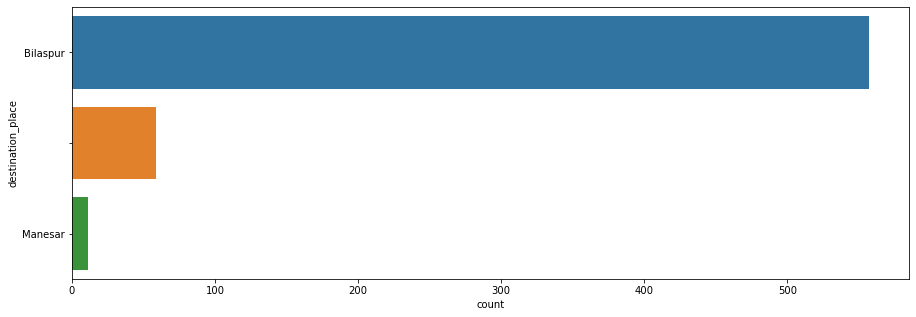

In [307]:
plt.figure(figsize=(15,5))
gur_data2 = final_data[final_data['destination_city']=='Gurgaon']
sns.countplot(data=gur_data2, y='destination_place', order=gur_data2.destination_place.value_counts().index[:3])
plt.show()

`Top places for all three top state's cities are:`

`Mumbai has Hub and Sanpada.`

`Bengaluru has Nelmangla, bomsndra, KG airport.`

`Gurgaon has Bilaspur only`

In [308]:
final_data['corridor_city'] = final_data.apply(lambda x: x['source_city']+':'+x['source_place']+'-'+x['destination_city']+':'+x['destination_place'], axis=1)

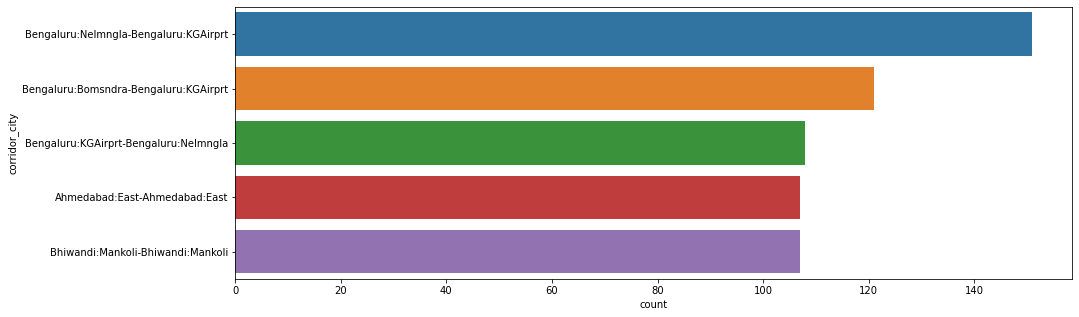

In [309]:
plt.figure(figsize=(15,5))
sns.countplot(data=final_data, y='corridor_city', order=final_data.corridor_city.value_counts().index[:5])
plt.show()

`below 5 are most busiest corridors`
1. 'Bengaluru:Nelmngla-Bengaluru:KGAirprt'
2. 'Bengaluru:Bomsndra-Bengaluru:KGAirprt'
3. 'Bengaluru:KGAirprt-Bengaluru:Nelmngla'
4. 'Ahmedabad:East-Ahmedabad:East'
5. 'Bhiwandi:Mankoli-Bhiwandi:Mankoli'

`Average time and distance between top 5 busiest corridors.`

In [310]:
for cord in final_data.corridor_city.value_counts().index[:5]:
    mean_distance = final_data[final_data['corridor_city']== cord]['actual_distance_to_destination'].mean()
    mean_time = final_data[final_data['corridor_city']== cord]['actual_time'].mean()
    print(f'Corridor -  {cord} \n mean distance: {mean_distance}, mean time: {mean_time} \n\n')

Corridor -  Bengaluru:Nelmngla-Bengaluru:KGAirprt 
 mean distance: 28.03152317880793, mean time: 87.87417218543047 


Corridor -  Bengaluru:Bomsndra-Bengaluru:KGAirprt 
 mean distance: 41.72719008264462, mean time: 114.66115702479338 


Corridor -  Bengaluru:KGAirprt-Bengaluru:Nelmngla 
 mean distance: 28.087685185185165, mean time: 105.23148148148148 


Corridor -  Ahmedabad:East-Ahmedabad:East 
 mean distance: 38.744672897196274, mean time: 123.74766355140187 


Corridor -  Bhiwandi:Mankoli-Bhiwandi:Mankoli 
 mean distance: 82.1277570093458, mean time: 228.05607476635515 




### Bivariate Analysis

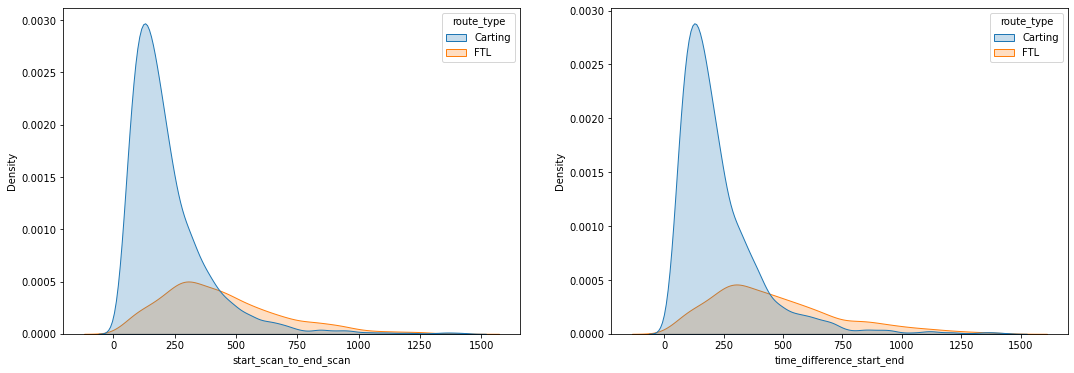

In [311]:
plt.figure(figsize=(18,6))
           
plt.subplot(1,2,1)
sns.kdeplot(data = final_data, x = 'start_scan_to_end_scan', hue='route_type', fill=True)

plt.subplot(1,2,2)
sns.kdeplot(data = final_data, x = 'time_difference_start_end', hue='route_type', fill=True)

plt.show()

`Carting route type has more density around 200-250 range.`

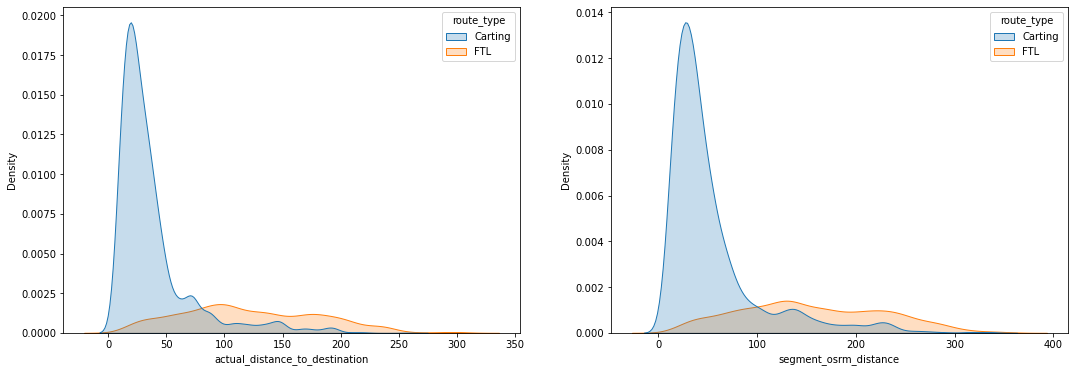

In [312]:
plt.figure(figsize=(18,6))
           
plt.subplot(1,2,1)
sns.kdeplot(data = final_data, x = 'actual_distance_to_destination', hue='route_type', fill=True)

plt.subplot(1,2,2)
sns.kdeplot(data = final_data, x = 'segment_osrm_distance', hue='route_type', fill=True)

plt.show()

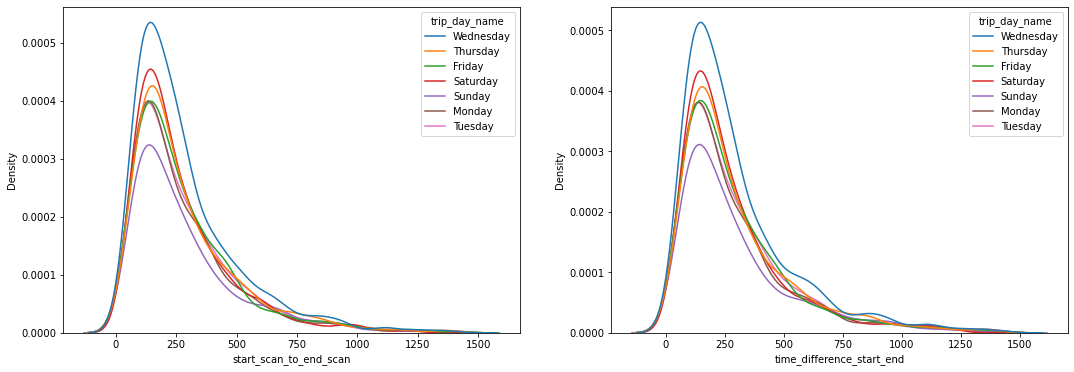

In [313]:
plt.figure(figsize=(18,6))
           
plt.subplot(1,2,1)
sns.kdeplot(data = final_data, x = 'start_scan_to_end_scan', hue='trip_day_name', fill=False)

plt.subplot(1,2,2)
sns.kdeplot(data = final_data, x = 'time_difference_start_end', hue='trip_day_name', fill=False)

plt.show()

`All days distributions same but wednesday has peak with highest density.`

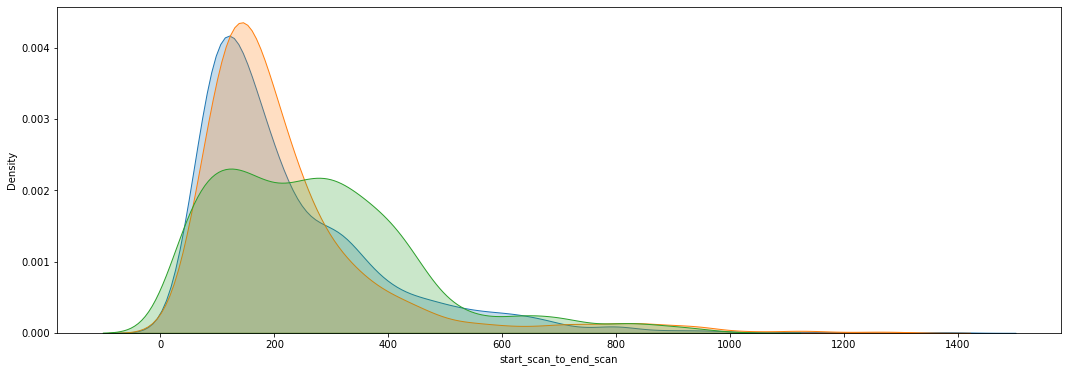

In [314]:
plt.figure(figsize=(18,6))

sns.kdeplot(data = final_data[final_data['source_state']=='Maharashtra'], x = 'start_scan_to_end_scan', fill=True)

sns.kdeplot(data = final_data[final_data['source_state']=='Karnataka'], x = 'start_scan_to_end_scan', fill=True)

sns.kdeplot(data = final_data[final_data['source_state']=='Haryana'], x = 'start_scan_to_end_scan', fill=True)

plt.show()

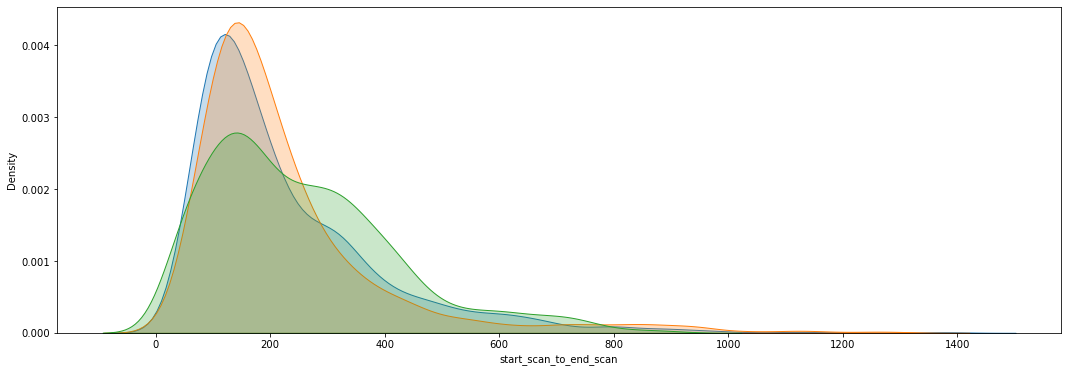

In [315]:
plt.figure(figsize=(18,6))

sns.kdeplot(data = final_data[final_data['destination_state']=='Maharashtra'], x = 'start_scan_to_end_scan', fill=True)

sns.kdeplot(data = final_data[final_data['destination_state']=='Karnataka'], x = 'start_scan_to_end_scan', fill=True)

sns.kdeplot(data = final_data[final_data['destination_state']=='Haryana'], x = 'start_scan_to_end_scan', fill=True)

plt.show()

`Maharashtra and Karnataka have same distributions for both source and destination and peak is around 100-150 where  haryana has kind of flat distribution with less density.`

### One hot encoding for Route type

In [316]:
final_data = pd.get_dummies(final_data, columns = ['route_type'])
final_data.shape

(11727, 25)

In [317]:
final_data.head()

data  start_scan_to_end_scan  actual_distance_to_destination  \
0  training                   180.0                           73.19   
1  training                   100.0                           17.18   
2  training                   717.0                          127.45   
3  training                   189.0                           24.60   
4  training                    98.0                            9.10   

   actual_time  osrm_time  osrm_distance  segment_actual_time  \
0        143.0       68.0          85.11                141.0   
1         59.0       15.0          19.68                 59.0   
2        341.0      117.0         146.79                340.0   
3         61.0       23.0          28.06                 60.0   
4         24.0       13.0          12.02                 24.0   

   segment_osrm_time  segment_osrm_distance source_city source_place  \
0               65.0                  84.19      Tumkur     Veersagr   
1               16.0                  19.88      Mumbai          Hub   
2              115.0                 146.79     Bellary           Dc   
3               23.0                  28.06     Chennai        Porur   
4               13.0                  12.02     Chennai     Chrompet   

  source_code source_state destination_city destination_place  \
0           I    Karnataka       Chikblapur          ShntiSgr   
1          HB  Maharashtra           Mumbai            MiraRd   
2          HB    Karnataka          Bellary                Dc   
3         DPC   Tamil Nadu          Chennai  Sriperumbudur Dc   
4         DPC   Tamil Nadu          Chennai       Vandalur Dc   

  destination_code destination_state  trip_year trip_month  trip_day  \
0                D         Karnataka       2018  September        12   
1               IP       Maharashtra       2018  September        12   
2                H         Karnataka       2018  September        12   
3               HB        Tamil Nadu       2018  September        12   
4               HB        Tamil Nadu       2018  September        12   

  trip_day_name  time_difference_start_end  \
0     Wednesday                     181.61   
1     Wednesday                     100.49   
2     Wednesday                     718.35   
3     Wednesday                     190.49   
4     Wednesday                      98.01   

                            corridor_city  route_type_Carting  route_type_FTL  
0     Tumkur:Veersagr-Chikblapur:ShntiSgr                   1               0  
1                Mumbai:Hub-Mumbai:MiraRd                   1               0  
2                   Bellary:Dc-Bellary:Dc                   0               1  
3  Chennai:Porur-Chennai:Sriperumbudur Dc                   1               0  
4    Chennai:Chrompet-Chennai:Vandalur Dc                   1               0

In [318]:
final_data['trip_year'] = final_data['trip_year'].astype(str)

### Coorelation

In [319]:
final_data_num = final_data._get_numeric_data()
final_data_num.head()

start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                   180.0                           73.19        143.0   
1                   100.0                           17.18         59.0   
2                   717.0                          127.45        341.0   
3                   189.0                           24.60         61.0   
4                    98.0                            9.10         24.0   

   osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0       68.0          85.11                141.0               65.0   
1       15.0          19.68                 59.0               16.0   
2      117.0         146.79                340.0              115.0   
3       23.0          28.06                 60.0               23.0   
4       13.0          12.02                 24.0               13.0   

   segment_osrm_distance  trip_day  time_difference_start_end  \
0                  84.19        12                     181.61   
1                  19.88        12                     100.49   
2                 146.79        12                     718.35   
3                  28.06        12                     190.49   
4                  12.02        12                      98.01   

   route_type_Carting  route_type_FTL  
0                   1               0  
1                   1               0  
2                   0               1  
3                   1               0  
4                   1               0

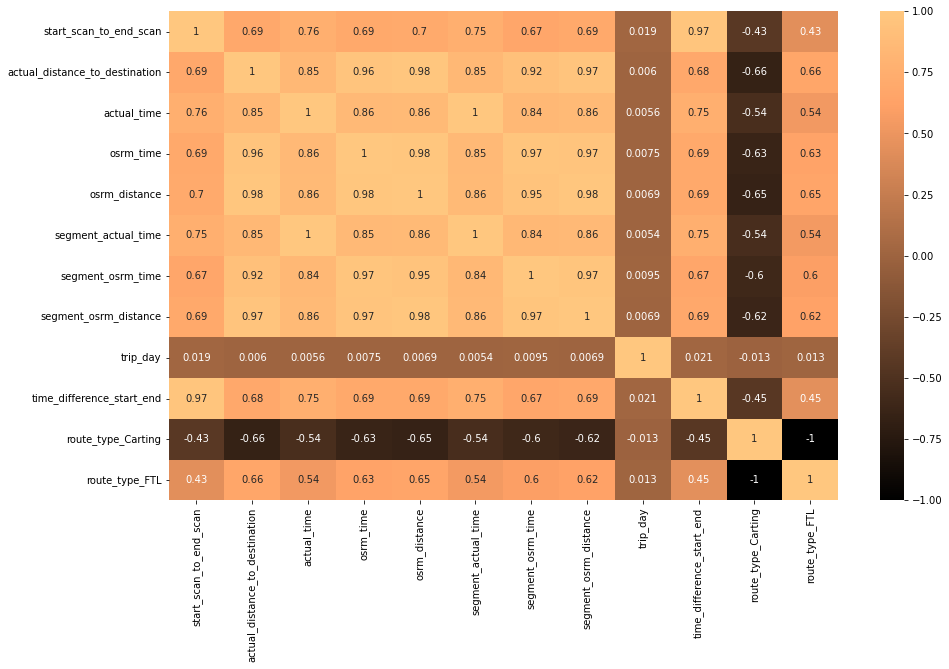

In [320]:
plt.figure(figsize=(15,9))
sns.heatmap(final_data_num.corr(method='pearson'),annot=True, cmap='copper')
plt.show()

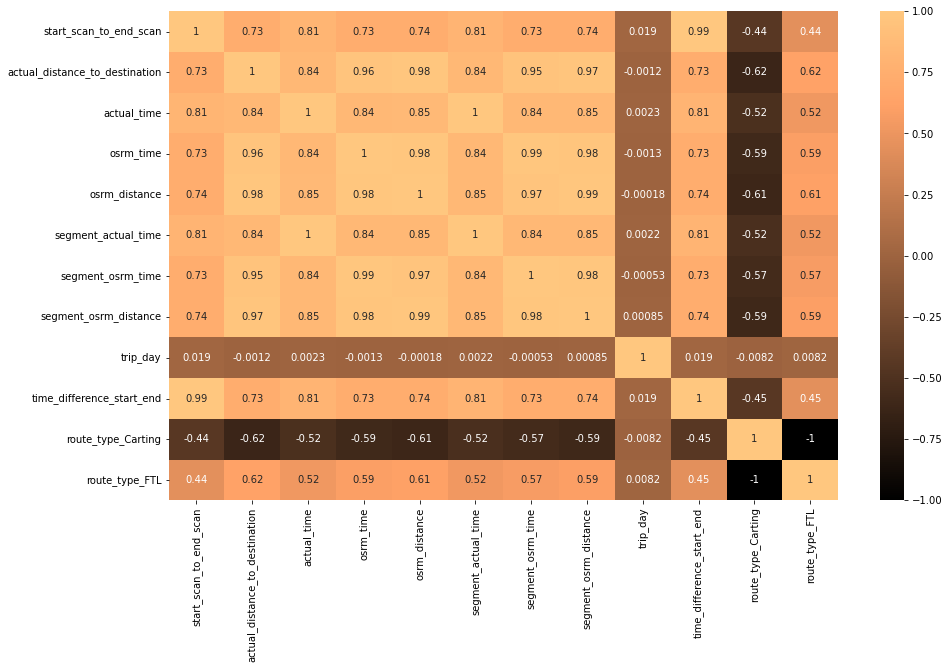

In [321]:
plt.figure(figsize=(15,9))
sns.heatmap(final_data_num.corr(method='spearman'),annot=True, cmap='copper')
plt.show()

### Pair Plot

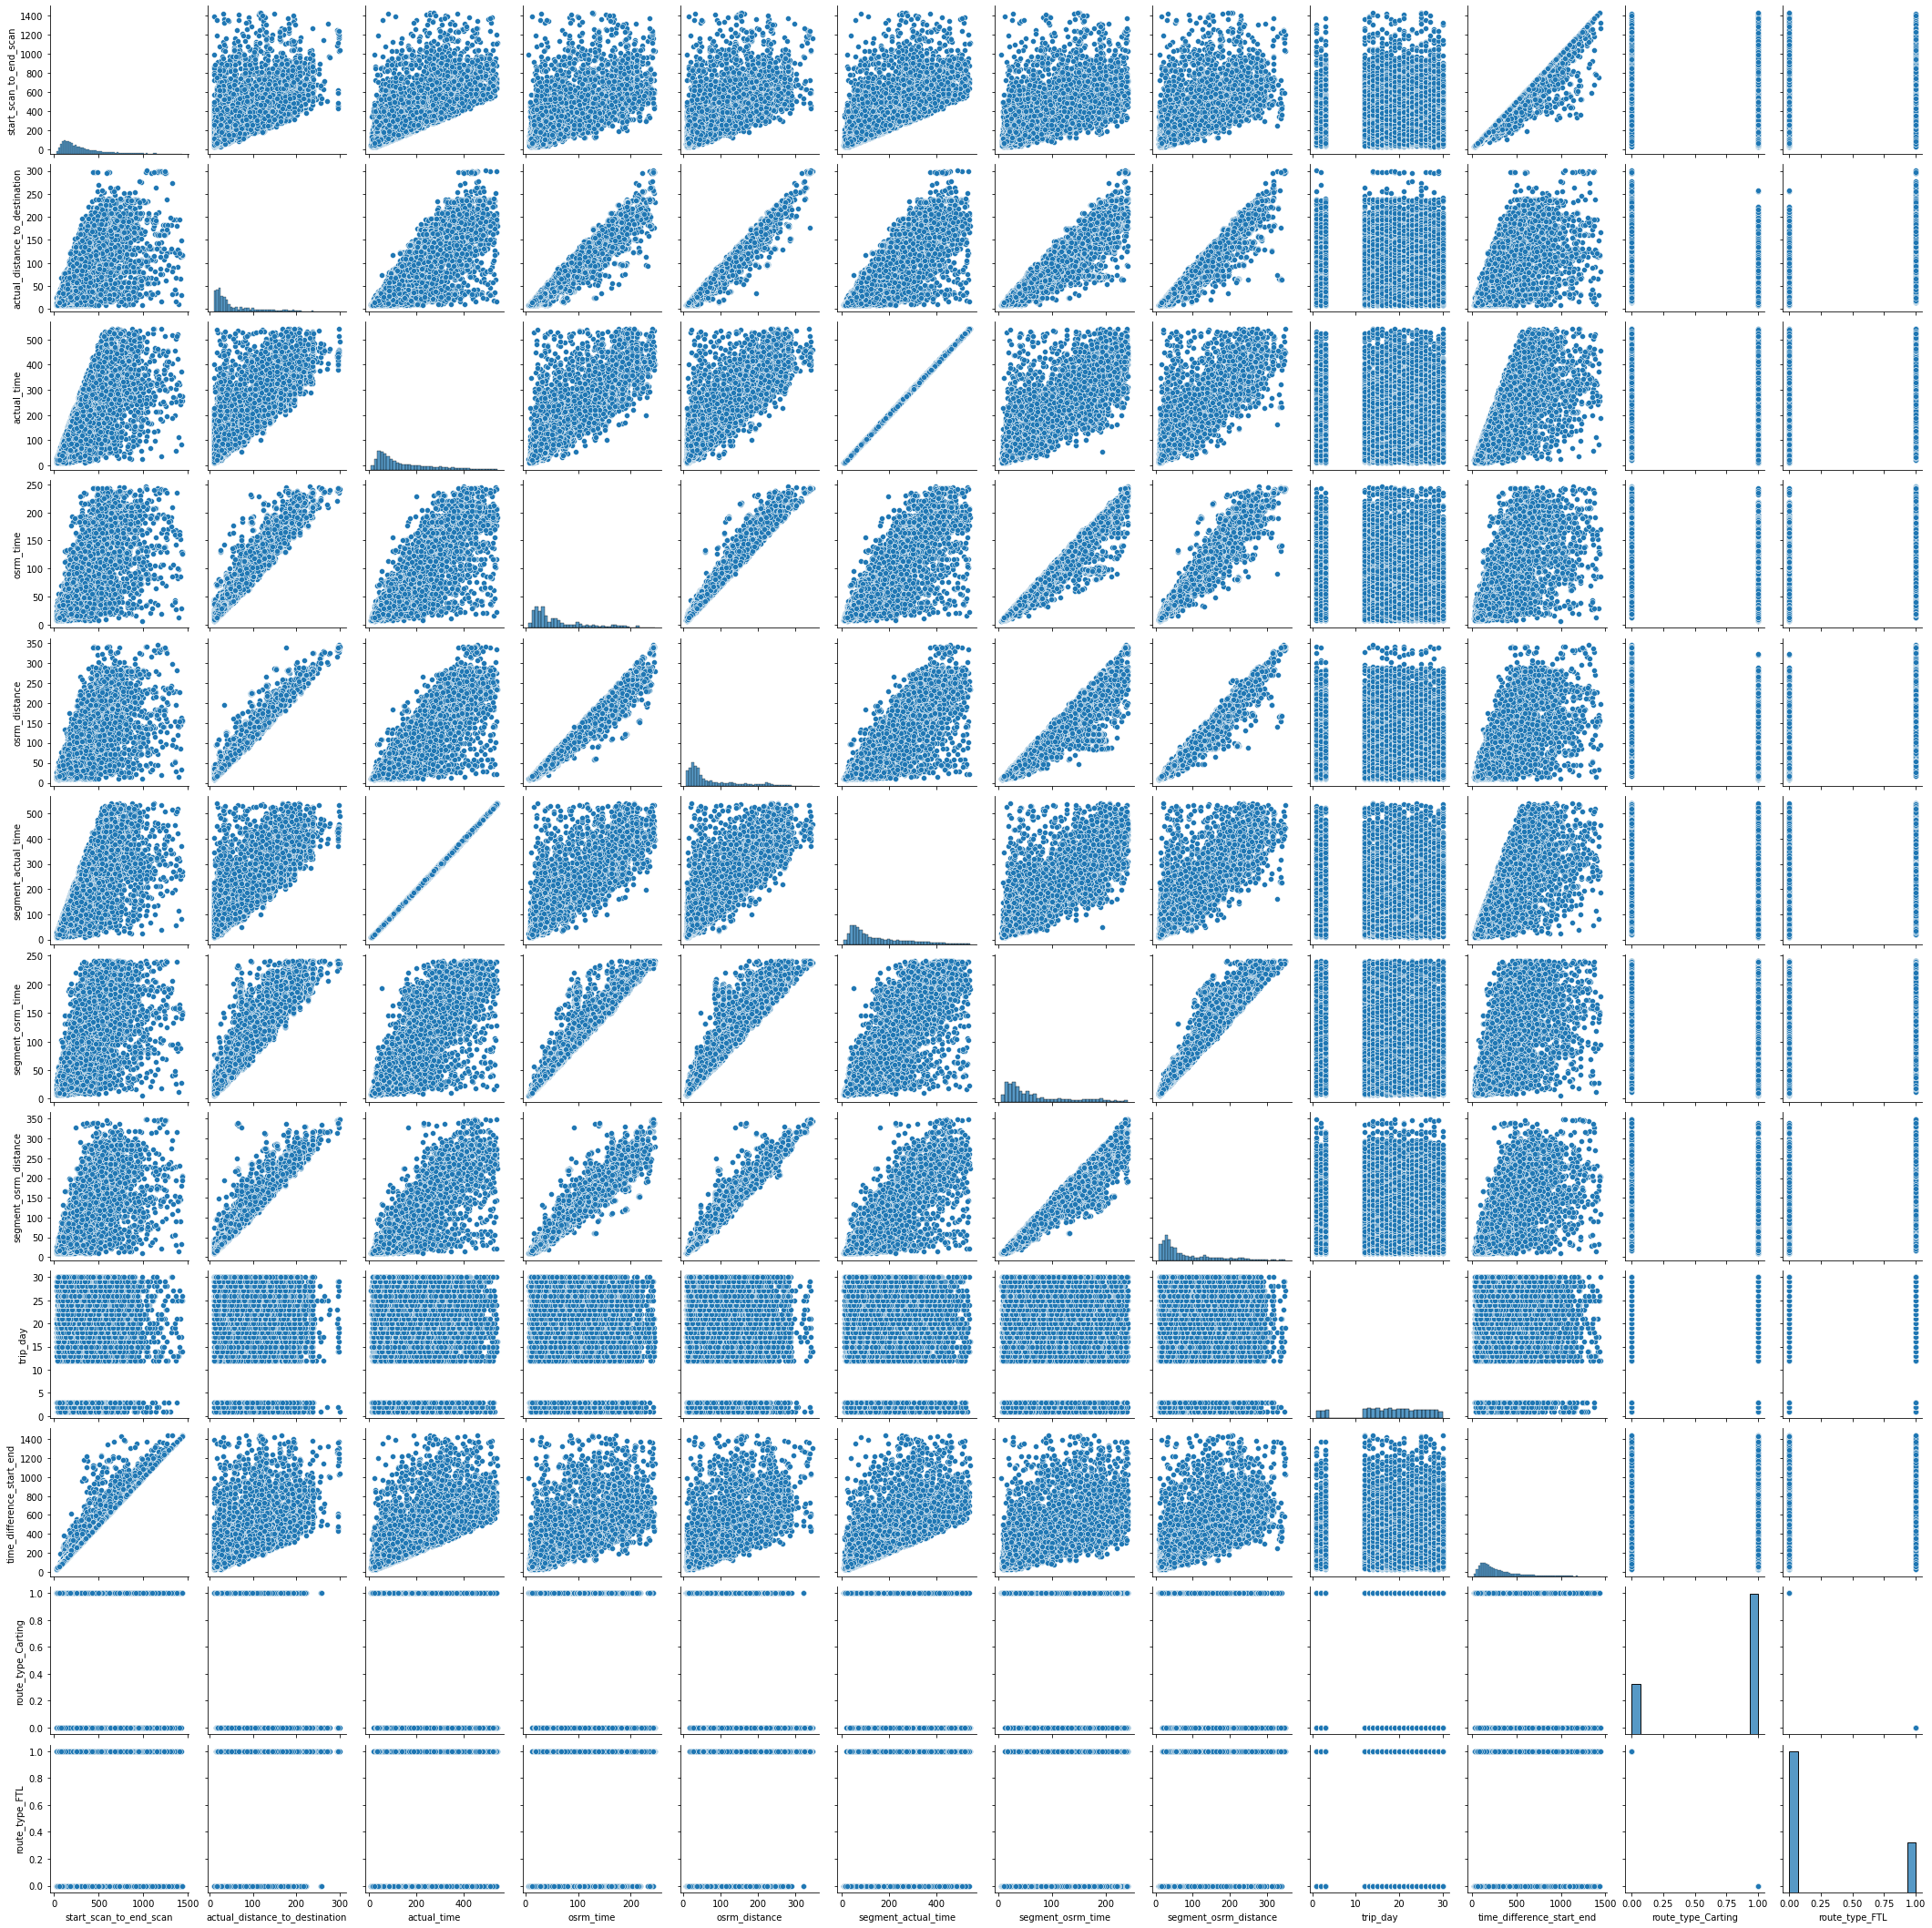

In [322]:
sns.pairplot(final_data_num)
plt.show()

`All time variations Actual time, start_scan_to_end_scan etc. are very correlated with each ohter.`

`Where route FTl is positive correlated and root carting is negative correlated with all time and distance features.`

`Both distance features actual distance and osrm distance are very correlated with each time feature.`

`All distance and time features are very much correlated with each other.`

### Statstical Tests / Hypothesis Testing

#### 2 samples T-Test: start_scan_to_end_scan -  time_difference_start_end

In [323]:
scan_time = final_data['start_scan_to_end_scan']
time_diff = final_data['time_difference_start_end']
len(scan_time), len(final_data)

(11727, 11727)

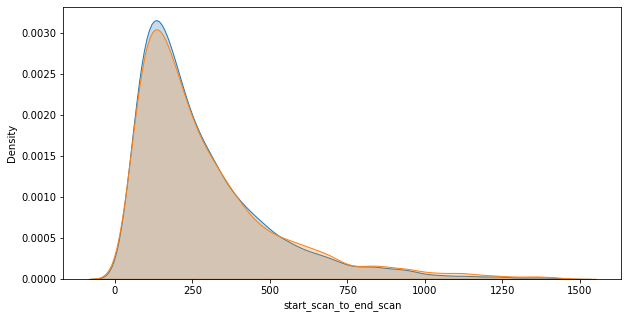

In [324]:
sns.kdeplot(scan_time, fill=True)
sns.kdeplot(time_diff, fill=True)
plt.show()

`Both time features have same distributinos.`

`Assumptions`

1. The sample size should be less than 30.
2. The population variance is unknown.
3. The population mean and standard deviation are finite.
4. The means of the two populations being compared should follow normal distributions.
5. Both distributions follows normal distributions.
6. Variance of both time features are almost same.

`Let's do qq plot and Shapiro-wilk test for normal distributions assumptions.`

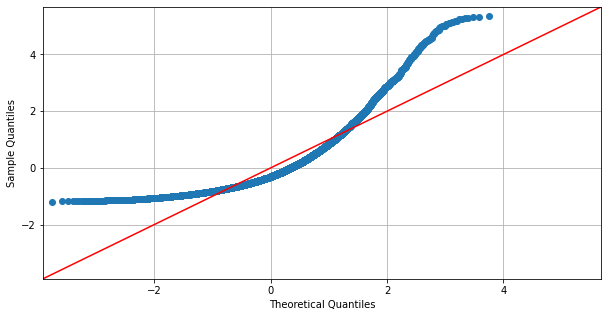

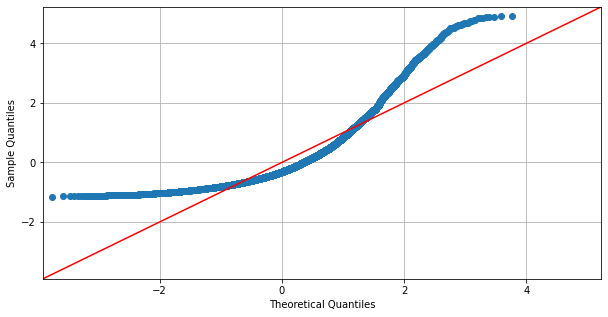

In [325]:
# qq plot
import statsmodels.api as sm

sm.qqplot(scan_time, line='45', fit=True)
plt.grid()
sm.qqplot(time_diff, line='45', fit=True)
plt.grid()

`Both features are not following normal distributions.`

`Shapiro-wilk test`

Null Hypothesis:  𝐻0 :  time feature follow normal distributions.

Alternative Hypothesis:  𝐻𝑎 : time feature does not follow normal distributions.

Alpha value: 5%

In [326]:
import scipy.stats as stats 

a1 = np.random.choice(scan_time, size=500) 
a2 = np.random.choice(time_diff, size=500)
print(stats.shapiro(a1))
print(stats.shapiro(a2))

ShapiroResult(statistic=0.8217990398406982, pvalue=3.786612808873189e-23)
ShapiroResult(statistic=0.7972245216369629, pvalue=1.6480713412858888e-24)


p-value for both features are < 5% near 0, meaning we will reject 𝐻0 and accept 𝐻𝑎:both time feature does not follow normal distributions. 

`Levene’s Test` to check variacne of both time features are same or not.

Null Hypothesis: 𝐻0 : scan time and time diff have same variance

Alternative Hypothesis: 𝐻𝑎 : scan time and time diff have not same variance

Alpha value: 5%

In [327]:
print(stats.levene(scan_time, time_diff))
scan_time.var(), time_diff.var()

LeveneResult(statistic=21.74243317637271, pvalue=3.135344736085057e-06)


(46711.48409146798, 54831.37913833022)

p value for test is < 5%, near 0 so we can reject Ho and accept Ha. Scan time and time diff have not same variance and we have actual values also and there is a big difference.

But still we can go ahead and perform T-test.

`2 samples T-test`

Null Hypothesis: 𝐻0 : $μ_{scan-time}$ = $μ_{time-diff}$

Alternative Hypothesis: 𝐻𝑎 : $μ_{scan-time}$ != $μ_{time-diff}$

Alpha value: 5%

In [328]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(scan_time, time_diff)
print(f"T-test statistic is {t_stat} and p_value is {p_value}")

T-test statistic is -4.283438704154492 and p_value is 1.8475893268692544e-05


`p-value is <5%, so we can reject Ho and accept Ha, μ𝑠𝑐𝑎𝑛−𝑡𝑖𝑚𝑒  != μ𝑡𝑖𝑚𝑒−𝑑𝑖𝑓𝑓`

`CLT`

In [329]:
scantime_sample_means=[scan_time.sample(1000, replace=True).mean() for i in range(500)]
timediff_sample_means=[time_diff.sample(1000, replace=True).mean() for i in range(500)]

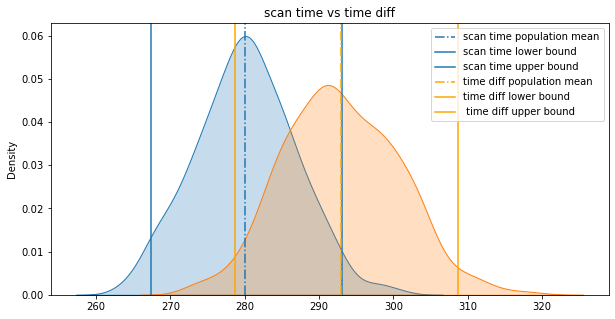

In [330]:
sns.kdeplot(scantime_sample_means, fill=True)
plt.axvline(np.mean(scantime_sample_means), linestyle='dashdot', label='scan time population mean')
plt.axvline(np.percentile(scantime_sample_means,2.5), label='scan time lower bound')
plt.axvline(np.percentile(scantime_sample_means,97.5), label='scan time upper bound')

sns.kdeplot(timediff_sample_means, fill=True)
plt.axvline(np.mean(timediff_sample_means), linestyle='dashdot', label='time diff population mean', color='orange')
plt.axvline(np.percentile(timediff_sample_means,2.5), color='orange', label='time diff lower bound')
plt.axvline(np.percentile(timediff_sample_means,97.5), color='orange', label=' time diff upper bound')

plt.title('scan time vs time diff')
plt.legend()
plt.show()

`By CLT, its very clear that both means are very far from each other.`

### 2 samples T-Test: actual_time aggregated value and OSRM time aggregated value

In [331]:
actual_time = final_data['actual_time']
osrm_time = final_data['osrm_time']
len(actual_time), len(osrm_time)

(11727, 11727)

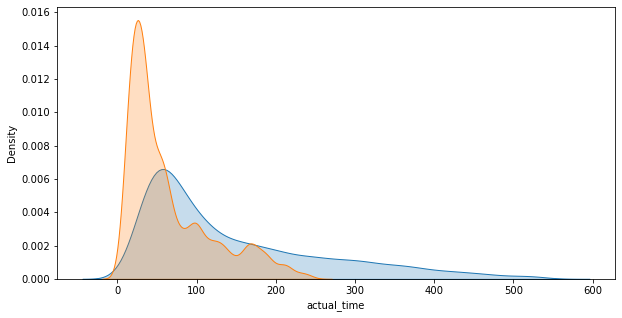

In [332]:
sns.kdeplot(actual_time, fill=True)
sns.kdeplot(osrm_time, fill=True)
plt.show()

In [333]:
actual_time.mean(), osrm_time.mean()

(146.19084164748017, 65.11528950285665)

`Both time's distributions are totally different.`

`Means are also very different from each other.`

`Assumptions are same that above mentioned.`

`QQ plot and Shapiro-wilk test for normal distributions assumptions.`

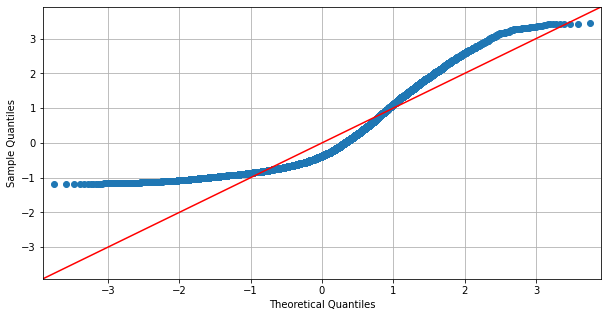

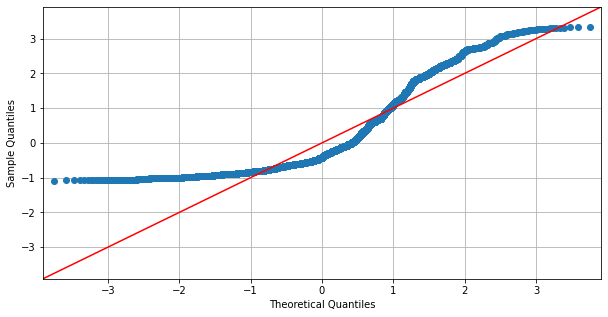

In [334]:
sm.qqplot(actual_time, line='45', fit=True)
plt.grid()
sm.qqplot(osrm_time, line='45', fit=True)
plt.grid()

`Both time features are not following normal distributions.`

`Shapiro-wilk test`

Null Hypothesis: 𝐻0 : time feature follow normal distributions.

Alternative Hypothesis: 𝐻𝑎 : time feature does not follow normal distributions.

Alpha value: 5%`

In [335]:
import scipy.stats as stats 

a1 = np.random.choice(actual_time, size=500) 
a2 = np.random.choice(osrm_time, size=500)
print(stats.shapiro(a1))
print(stats.shapiro(a2))

ShapiroResult(statistic=0.8434109091758728, pvalue=7.926045740199266e-22)
ShapiroResult(statistic=0.8574261665344238, pvalue=6.776386362656579e-21)


`p-value for both features are < 5% near 0, meaning we will reject 𝐻0 and accept 𝐻𝑎: both time features do not follow normal distributions. `

`Levene’s Test` to check variacne of both time features are same or not.

Null Hypothesis: 𝐻0 : actual time and osrm time have same variance

Alternative Hypothesis: 𝐻𝑎 : actual time and osrm time have not same variance

Alpha value: 5%

In [336]:
print(stats.levene(actual_time, osrm_time))
actual_time.var(), osrm_time.var()

LeveneResult(statistic=2805.296288930614, pvalue=0.0)


(13328.262399487701, 2924.097742503147)

p value for test is < 5%, equals to 0 so we can reject Ho and accept Ha. actual time and osrm time have not same variance and we have actual values also and there is a big difference.

But still we can go ahead and perform T-test.

#### 2 samples T-test

Null Hypothesis: 𝐻0 : $μ_{actual-time}$ = $μ_{osrm-time}$

Alternative Hypothesis: 𝐻𝑎 : $μ_{actual-time}$ != $μ_{osrm-time}$

Alpha value: 5%

In [337]:
t_stat, p_value = ttest_ind(actual_time, osrm_time)
print(f"T-test statistic is {t_stat} and p_value is {p_value}")

T-test statistic is 68.86921914115959 and p_value is 0.0


`p-value is <5%, so we can reject Ho and accept Ha, μ𝑎𝑐𝑡𝑢𝑎𝑙−𝑡𝑖𝑚𝑒  !=  μ𝑜𝑠𝑟𝑚−𝑡𝑖𝑚𝑒`

`CLT`

In [338]:
actual_sample_means=[actual_time.sample(1000, replace=True).mean() for i in range(500)]
osrm_sample_means=[osrm_time.sample(1000, replace=True).mean() for i in range(500)]

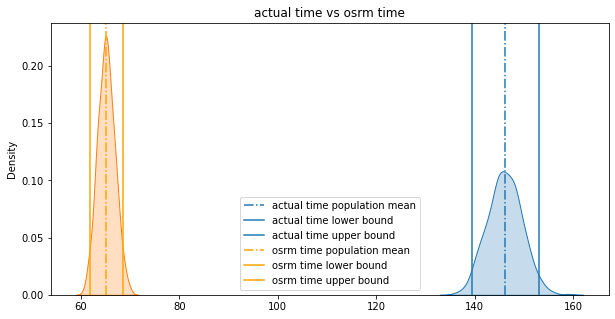

In [339]:
sns.kdeplot(actual_sample_means, fill=True)
plt.axvline(np.mean(actual_sample_means), linestyle='dashdot', label='actual time population mean')
plt.axvline(np.percentile(actual_sample_means,2.5), label='actual time lower bound')
plt.axvline(np.percentile(actual_sample_means,97.5), label='actual time upper bound')

sns.kdeplot(osrm_sample_means, fill=True)
plt.axvline(np.mean(osrm_sample_means), linestyle='dashdot', label='osrm time population mean', color='orange')
plt.axvline(np.percentile(osrm_sample_means,2.5), color='orange', label='osrm time lower bound')
plt.axvline(np.percentile(osrm_sample_means,97.5), color='orange', label='osrm time upper bound')

plt.title('actual time vs osrm time')
plt.legend()
plt.show()

`By CLT, its very clear that both means are very far from each other.`

### 2 samples T-Test actual_time aggregated value and segment actual time aggregated value 

In [340]:
actual_time = final_data['actual_time']
segment_actual_time = final_data['segment_actual_time']
len(actual_time), len(segment_actual_time)

(11727, 11727)

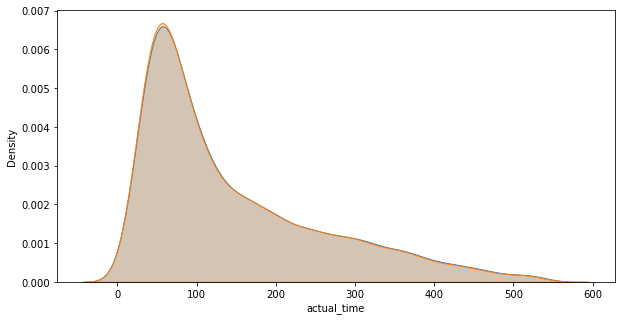

In [341]:
sns.kdeplot(actual_time, fill=True)
sns.kdeplot(segment_actual_time, fill=True)
plt.show()

In [342]:
actual_time.mean(), segment_actual_time.mean()

(146.19084164748017, 144.73718768653535)

`Both time's distributions are exactly same.`

`Means are also very close to each other.`

`Assumptions are same that above mentioned  for t-test`

`QQ plot and Shapiro-wilk test for normal distributions assumptions.`

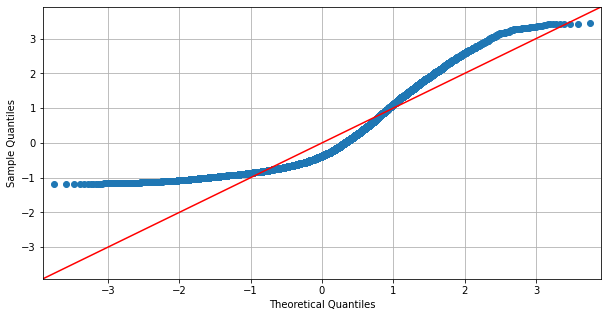

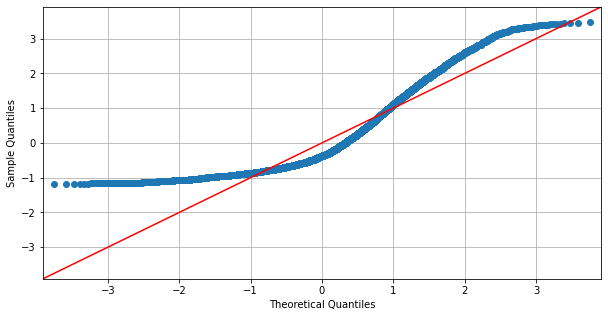

In [343]:
sm.qqplot(actual_time, line='45', fit=True)
plt.grid()
sm.qqplot(segment_actual_time, line='45', fit=True)
plt.grid()

`Both time features are not following normal distributions.`

`Shapiro-wilk test`

Null Hypothesis: 𝐻0 : time feature follow normal distributions.

Alternative Hypothesis: 𝐻𝑎 : time feature does not follow normal distributions.

Alpha value: 5%`

In [344]:
import scipy.stats as stats 

a1 = np.random.choice(actual_time, size=500) 
a2 = np.random.choice(segment_actual_time, size=500)
print(stats.shapiro(a1))
print(stats.shapiro(a2))

ShapiroResult(statistic=0.8550655245780945, pvalue=4.6704753998728516e-21)
ShapiroResult(statistic=0.8761134743690491, pvalue=1.5365042729355585e-19)


`p-value for both features are < 5% near 0, meaning we will reject 𝐻0 and accept 𝐻𝑎: both time features do not follow normal distributions. `

`Levene’s Test` to check variacne of both time features are same or not.

Null Hypothesis: 𝐻0 : actual time and segment actual time have same variance

Alternative Hypothesis: 𝐻𝑎 : actual time and segment actual time have not same variance

Alpha value: 5%

In [345]:
print(stats.levene(actual_time, segment_actual_time))
actual_time.var(), segment_actual_time.var()

LeveneResult(statistic=0.39347740403197173, pvalue=0.5304832776663335)


(13328.262399487701, 13126.72266863807)

p value for test is > 5%, so we can accept Ho and reject Ha. actual time and segment actual time have same variance and we have actual values also and there is not a difference.


#### 2 samples T-test

Null Hypothesis: 𝐻0 : $μ_{actual-time}$ = $μ_{segment-actual-time}$

Alternative Hypothesis: 𝐻𝑎 : $μ_{actual-time}$ != $μ_{segment-actual-time}$

Alpha value: 5%

In [346]:
t_stat, p_value = ttest_ind(actual_time, segment_actual_time)
print(f"T-test statistic is {t_stat} and p_value is {p_value}")

T-test statistic is 0.9678336955955449 and p_value is 0.33313741311187883


`p-value is >5%, so we can accept Ho and reject Ha, μ𝑎𝑐𝑡𝑢𝑎𝑙−𝑡𝑖𝑚𝑒 = μ𝑠𝑒𝑔𝑚𝑒𝑛𝑡−𝑎𝑐𝑡𝑢𝑎𝑙−𝑡𝑖𝑚𝑒`

`CLT`

In [347]:
actual_sample_means=[actual_time.sample(1000, replace=True).mean() for i in range(500)]
segment_actual_sample_means=[segment_actual_time.sample(1000, replace=True).mean() for i in range(500)]

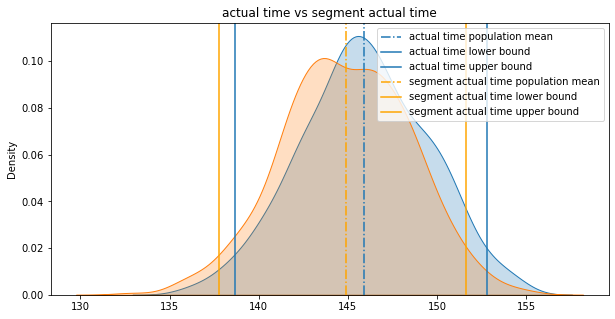

In [348]:
sns.kdeplot(actual_sample_means, fill=True)
plt.axvline(np.mean(actual_sample_means), linestyle='dashdot', label='actual time population mean')
plt.axvline(np.percentile(actual_sample_means,2.5), label='actual time lower bound')
plt.axvline(np.percentile(actual_sample_means,97.5), label='actual time upper bound')

sns.kdeplot(segment_actual_sample_means, fill=True)
plt.axvline(np.mean(segment_actual_sample_means), linestyle='dashdot', label='segment actual time population mean', color='orange')
plt.axvline(np.percentile(segment_actual_sample_means,2.5), color='orange', label='segment actual time lower bound')
plt.axvline(np.percentile(segment_actual_sample_means,97.5), color='orange', label='segment actual time upper bound')

plt.title('actual time vs segment actual time')
plt.legend()
plt.show()

`By CLT, its very clear that both means are very close to each other.`

### 2 samples T-test for osrm time aggregated value and segment osrm time aggregated value

In [349]:
osrm_time = final_data['osrm_time']
segment_osrm_time = final_data['segment_osrm_time']
len(osrm_time), len(segment_osrm_time)

(11727, 11727)

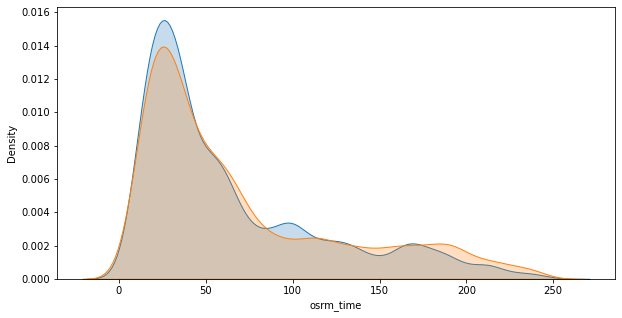

In [350]:
sns.kdeplot(osrm_time, fill=True)
sns.kdeplot(segment_osrm_time, fill=True)
plt.show()

In [351]:
osrm_time.mean(), segment_osrm_time.mean()

(65.11528950285665, 70.63443335891532)

`Both time's distributions are almost same.`

`Means are also same for both.`

`QQ Plot`

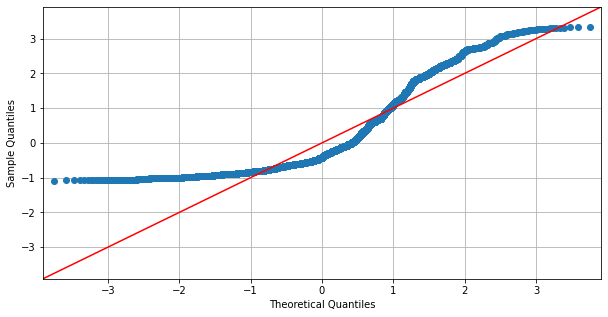

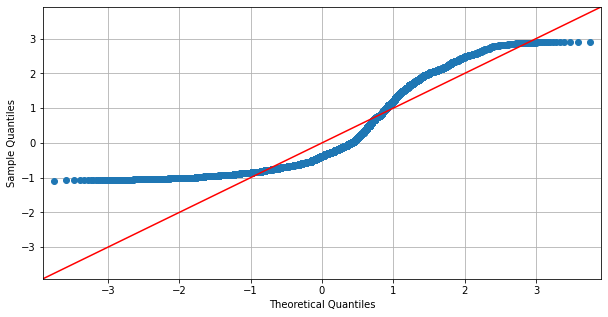

In [352]:
sm.qqplot(osrm_time, line='45', fit=True)
plt.grid()
sm.qqplot(segment_osrm_time, line='45', fit=True)
plt.grid()

`Both time features are not following normal distributions.`

`Shapiro-wilk test`

Null Hypothesis: 𝐻0 : time feature follow normal distributions.

Alternative Hypothesis: 𝐻𝑎 : time feature does not follow normal distributions.

Alpha value: 5%`

In [353]:
import scipy.stats as stats 

a1 = np.random.choice(osrm_time, size=500) 
a2 = np.random.choice(segment_osrm_time, size=500)
print(stats.shapiro(a1))
print(stats.shapiro(a2))

ShapiroResult(statistic=0.8265829086303711, pvalue=7.239527357418304e-23)
ShapiroResult(statistic=0.8565035462379456, pvalue=5.855797752680064e-21)


`p-value for both features are < 5% near 0, meaning we will reject 𝐻0 and accept 𝐻𝑎: both time features do not follow normal distributions. `

`Levene’s Test` to check variacne of both time features are same or not.

Null Hypothesis: 𝐻0 : osrm time and segment osrm time have same variance

Alternative Hypothesis: 𝐻𝑎 : osrm time and segment osrm time have not same variance

Alpha value: 5%

In [354]:
print(stats.levene(osrm_time, segment_osrm_time))
osrm_time.var(), segment_osrm_time.var()

LeveneResult(statistic=52.15966180180072, pvalue=5.272793333210711e-13)


(2924.097742503147, 3465.8609769584446)

p value for test is < 5%, equals to 0 so we can reject Ho and accept Ha. osrm time and segment osrm time have not same variance and we have actual values also and there is a big difference.

But still we can go ahead and perform T-test.

#### 2 samples T-test

Null Hypothesis: 𝐻0 : $μ_{osrm-time}$ = $μ_{segment-osrm-time}$

Alternative Hypothesis: 𝐻𝑎 : $μ_{osrm-time}$ != $μ_{segment-osrm-time}$

Alpha value: 5%

In [355]:
t_stat, p_value = ttest_ind(osrm_time, segment_osrm_time)
print(f"T-test statistic is {t_stat} and p_value is {p_value}")

T-test statistic is -7.476806657346764 and p_value is 7.881878776778614e-14


`p-value is <5%, so we can reject Ho and accept Ha, μ𝑜𝑠𝑟𝑚−𝑡𝑖𝑚𝑒  != μ𝑠𝑒𝑔𝑚𝑒𝑛𝑡−𝑜𝑠𝑟𝑚−𝑡𝑖𝑚𝑒`

`CLT`

In [356]:
osrm_sample_means=[osrm_time.sample(1000, replace=True).mean() for i in range(500)]
segment_osrm_sample_means=[segment_osrm_time.sample(1000, replace=True).mean() for i in range(500)]

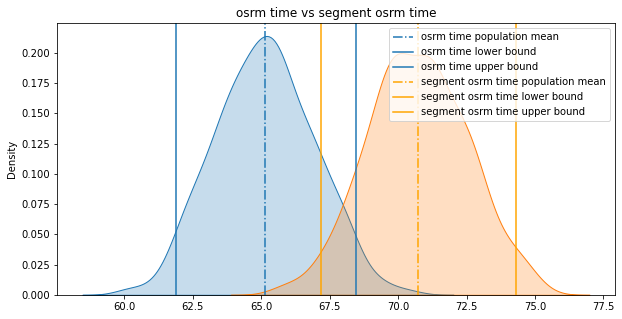

In [357]:
sns.kdeplot(osrm_sample_means, fill=True)
plt.axvline(np.mean(osrm_sample_means), linestyle='dashdot', label='osrm time population mean')
plt.axvline(np.percentile(osrm_sample_means,2.5), label='osrm time lower bound')
plt.axvline(np.percentile(osrm_sample_means,97.5), label='osrm time upper bound')

sns.kdeplot(segment_osrm_sample_means, fill=True)
plt.axvline(np.mean(segment_osrm_sample_means), linestyle='dashdot', label='segment osrm time population mean', color='orange')
plt.axvline(np.percentile(segment_osrm_sample_means,2.5), color='orange', label='segment osrm time lower bound')
plt.axvline(np.percentile(segment_osrm_sample_means,97.5), color='orange', label='segment osrm time upper bound')

plt.title('osrm time vs segment osrm time')
plt.legend()
plt.show()

`By CLT, its very clear that both means are very far from each other.`

### 2 samples T-test for osrm distance aggregated value and segment osrm distance aggregated value

In [358]:
osrm_distance = final_data['osrm_distance']
segment_osrm_distance = final_data['segment_osrm_distance']
len(osrm_distance), len(segment_osrm_distance)

(11727, 11727)

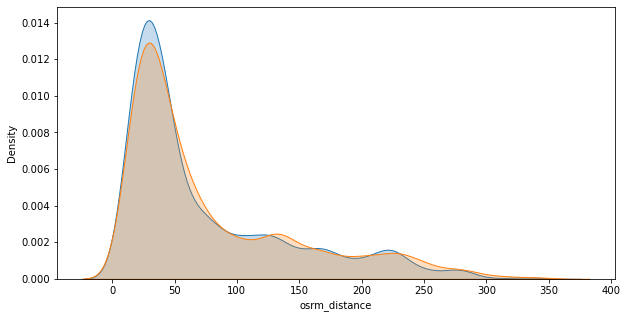

In [359]:
sns.kdeplot(osrm_distance, fill=True)
sns.kdeplot(segment_osrm_distance, fill=True)
plt.show()

`Both distance features have almost same distributinos.`

`Let's do qq plot and Shapiro-wilk test for normal distributions assumptions.`

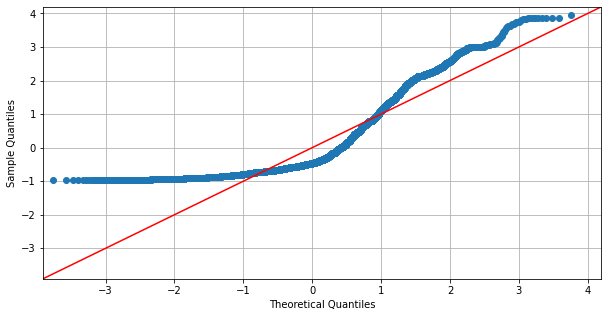

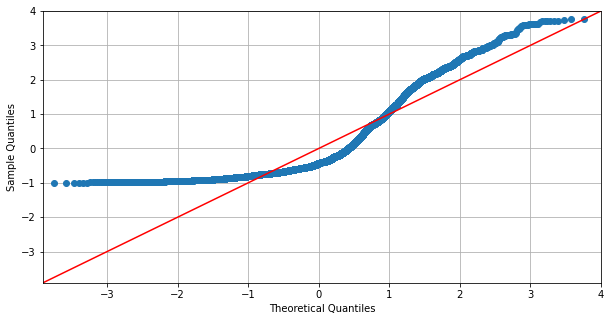

In [360]:
# qq plot
import statsmodels.api as sm

sm.qqplot(osrm_distance, line='45', fit=True)
plt.grid()
sm.qqplot(segment_osrm_distance, line='45', fit=True)
plt.grid()

`Both features are not following normal distributions.`

`Shapiro-wilk test`

Null Hypothesis:  𝐻0 :  distance feature follow normal distributions.

Alternative Hypothesis:  𝐻𝑎 : distabce feature does not follow normal distributions.

Alpha value: 5%

In [361]:
import scipy.stats as stats 

a1 = np.random.choice(osrm_distance, size=500) 
a2 = np.random.choice(segment_osrm_distance, size=500)
print(stats.shapiro(a1))
print(stats.shapiro(a2))

ShapiroResult(statistic=0.8471134901046753, pvalue=1.3771230398074201e-21)
ShapiroResult(statistic=0.8192825317382812, pvalue=2.707075908284322e-23)


p-value for both features are < 5% near 0, meaning we will reject 𝐻0 and accept 𝐻𝑎:both distance features do not follow normal distributions. 

`Levene’s Test` to check variacne of both time features are same or not.

Null Hypothesis: 𝐻0 : osrm distance and segment osrm distance have same variance

Alternative Hypothesis: 𝐻𝑎 : osrm distance and segment osrm distance have not same variance

Alpha value: 5%

In [362]:
print(stats.levene(osrm_distance, segment_osrm_distance))
osrm_distance.var(), segment_osrm_distance.var()

LeveneResult(statistic=15.951354226986899, pvalue=6.518941030886648e-05)


(4655.275535873741, 5124.557884413547)

p value for test is < 5%, near 0 so we can reject Ho and accept Ha. osrm distance and segment osrm distance have not same variance and we have actual values also and there is a big difference.

But still we can go ahead and perform T-test.

`2 samples T-test`

Null Hypothesis: 𝐻0 : $μ_{osrm-distance}$ = $μ_{segment-osrm-distance}$

Alternative Hypothesis: 𝐻𝑎 : $μ_{osrm-distance}$ != $μ_{segment-osrm-distance}$

Alpha value: 5%

In [363]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(osrm_distance, segment_osrm_distance)
print(f"T-test statistic is {t_stat} and p_value is {p_value}")

T-test statistic is -4.9159841925317345 and p_value is 8.893392035792385e-07


`p-value is <5%, so we can reject Ho and accept Ha, μ𝑜𝑠𝑟𝑚−𝑑𝑖𝑠𝑡𝑎𝑛𝑐𝑒  !=  μ𝑠𝑒𝑔𝑚𝑒𝑛𝑡−𝑜𝑠𝑟𝑚−𝑑𝑖𝑠𝑡𝑎𝑛𝑐𝑒`

`CLT`

In [364]:
osrm_dist_sample_means=[osrm_distance.sample(1000, replace=True).mean() for i in range(500)]
segment_osrm_dist_sample_means=[segment_osrm_distance.sample(1000, replace=True).mean() for i in range(500)]

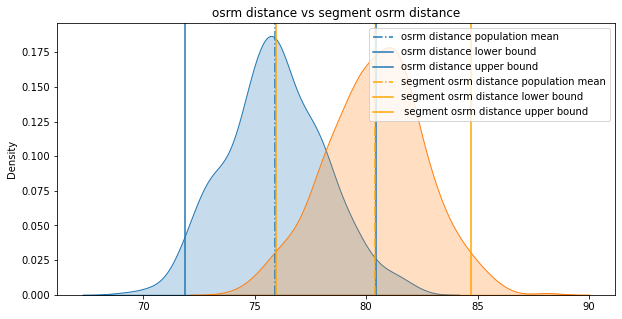

In [365]:
sns.kdeplot(osrm_dist_sample_means, fill=True)
plt.axvline(np.mean(osrm_dist_sample_means), linestyle='dashdot', label='osrm distance population mean')
plt.axvline(np.percentile(osrm_dist_sample_means,2.5), label='osrm distance lower bound')
plt.axvline(np.percentile(osrm_dist_sample_means,97.5), label='osrm distance upper bound')

sns.kdeplot(segment_osrm_dist_sample_means, fill=True)
plt.axvline(np.mean(segment_osrm_dist_sample_means), linestyle='dashdot', label='segment osrm distance population mean', color='orange')
plt.axvline(np.percentile(segment_osrm_dist_sample_means,2.5), color='orange', label='segment osrm distance lower bound')
plt.axvline(np.percentile(segment_osrm_dist_sample_means,97.5), color='orange', label=' segment osrm distance upper bound')

plt.title('osrm distance vs segment osrm distance')
plt.legend()
plt.show()

`By CLT, its very clear that both means are very far from each other.`

### Normalize/ Standardize 

In [366]:
final_data_num = final_data._get_numeric_data().head()
final_data_num.head()

start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                   180.0                           73.19        143.0   
1                   100.0                           17.18         59.0   
2                   717.0                          127.45        341.0   
3                   189.0                           24.60         61.0   
4                    98.0                            9.10         24.0   

   osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0       68.0          85.11                141.0               65.0   
1       15.0          19.68                 59.0               16.0   
2      117.0         146.79                340.0              115.0   
3       23.0          28.06                 60.0               23.0   
4       13.0          12.02                 24.0               13.0   

   segment_osrm_distance  trip_day  time_difference_start_end  \
0                  84.19        12                     181.61   
1                  19.88        12                     100.49   
2                 146.79        12                     718.35   
3                  28.06        12                     190.49   
4                  12.02        12                      98.01   

   route_type_Carting  route_type_FTL  
0                   1               0  
1                   1               0  
2                   0               1  
3                   1               0  
4                   1               0

`Standard Scaler`

In [367]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
std_data = scaler.fit_transform(final_data_num)
std_data = pd.DataFrame(std_data, columns=final_data_num.columns)
std_data.head()

start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0               -0.329227                        0.513523     0.151872   
1               -0.672172                       -0.743246    -0.581305   
2                1.972791                        1.731025     1.880077   
3               -0.290646                       -0.576754    -0.563848   
4               -0.680746                       -0.924547    -0.886796   

   osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0   0.516882       0.523210             0.141797           0.475854   
1  -0.800174      -0.755214            -0.575941          -0.777740   
2   1.734538       1.728365             1.883625           1.755033   
3  -0.601373      -0.591479            -0.567188          -0.598655   
4  -0.849874      -0.904882            -0.882293          -0.854491   

   segment_osrm_distance  trip_day  time_difference_start_end  \
0               0.509293       0.0                  -0.326187   
1              -0.750327       0.0                  -0.673526   
2               1.735420       0.0                   1.972022   
3              -0.590108       0.0                  -0.288165   
4              -0.904278       0.0                  -0.684145   

   route_type_Carting  route_type_FTL  
0                 0.5            -0.5  
1                 0.5            -0.5  
2                -2.0             2.0  
3                 0.5            -0.5  
4                 0.5            -0.5

`Min Max Scaler`

In [368]:
minmaxScaler = MinMaxScaler()
minmax_data = minmaxScaler.fit_transform(final_data_num)
minmax_data = pd.DataFrame(minmax_data, columns=final_data_num.columns)
minmax_data.head()

start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                0.132472                        0.541529     0.375394   
1                0.003231                        0.068272     0.110410   
2                1.000000                        1.000000     1.000000   
3                0.147011                        0.130967     0.116719   
4                0.000000                        0.000000     0.000000   

   osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0   0.528846       0.542331             0.370253           0.509804   
1   0.019231       0.056838             0.110759           0.029412   
2   1.000000       1.000000             1.000000           1.000000   
3   0.096154       0.119018             0.113924           0.098039   
4   0.000000       0.000000             0.000000           0.000000   

   segment_osrm_distance  trip_day  time_difference_start_end  \
0               0.535505       0.0                   0.134765   
1               0.058322       0.0                   0.003998   
2               1.000000       0.0                   1.000000   
3               0.119018       0.0                   0.149080   
4               0.000000       0.0                   0.000000   

   route_type_Carting  route_type_FTL  
0                 1.0             0.0  
1                 1.0             0.0  
2                 0.0             1.0  
3                 1.0             0.0  
4                 1.0             0.0

### Insights

1. Carting route type is popular and best for short duration trip around 3-4 hrs.
2. Mid of the month days are most busiest days.
3. Wednesday is the busiest day of the week.
4. Source states are 28 and destination states are 31 in counts.
5. Most of the orders are coming and deliver to Maharashtra, Karnataka and Haryana states.
6. Most of the orders are coming and deliver to Mumbai Hub, Bengaluru Nelmngla and Gurgaon Bilaspur city-place.
7. Bengaluru:Nelmngla - Bengaluru:KGAirprt - Bengaluru:Bomsndra are most busiest corridors.
8. Avg. Distance for Bengaluru:Nelmngla-Bengaluru:KGAirprt is 28 Km.
9. Avg. Time for for Bengaluru:Nelmngla-Bengaluru:KGAirprt is 88 Min.
10. Avg. Distance for Bengaluru:Bomsndra-Bengaluru:KGAirprt is 42 Km.
11. Avg. Time for for Bengaluru:Bomsndra-Bengaluru:KGAirprt  is 115 Min.
12. Avg. Distance for Bengaluru:KGAirprt-Bengaluru:Nelmngla is 28 Km.
13. Avg. Time for for Bengaluru:KGAirprt-Bengaluru:Nelmngla  is 105 Min.
14. All distance and time featuers are very much correlated with each other.
15. FTL route type has positive correlation with all distance and time features where Carting has negative.
16. There is a mean difference between scan time and trip duration time.
17. A big difference found in actual and OSRM mean times.
18. No difference between actual and segment actual mean times.
19. There is a difference between osrm - segment osrm mean times and distances.

### Recommendations

1. Business should take Carting route option more frequently for long duration and distance trips.
2. Business should utilize weekend for more deliveries.
3. As Bengaluru has most of the busiest corridors, business should add more routes for Bengaluru to reduce mean time and get more business.
4. Business should cover other popular cities of Maharashtra, Karnataka and NCR.
5. Business should improve their time measurement systems/applications.
6. Business should add more parameters to measure open source routing engine time to get real time as per the situation.
7. Business should break long trips into short to improve time constraint.
